<a href="https://colab.research.google.com/github/myusril31/NewProject/blob/main/credit%20card%20users%20e-commerce.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#**BUSINESS BACKGROUND**

*   Role : Data Analyst
*   Company: RevoBank

Today is January 31, 2023, One of RevoBank's partners is RevoShop, a well-established e-commerce marketplace company. Over the past 6 months, RevoBank implemented a new promotion exclusively for credit card users.

After running the promotion for 6 months, the Card Partnership Lead at RevoBank wants a better understanding of the spending patterns among RevoShop customers who are RevoBank credit card users.

For RevoBank, let's assume that every 100 euros spent on marketplace merchants generate 2.4 euros of revenue. This means that the bank earns a margin of 2.4% from the transaction amount

# OBJECTIVES



*   Finding spending patterns among RevoShop customers who are RevoBank credit card users
*   Finding ways to reduce cost of the promotions



# GOAL OF THE ANALYSIS

## 1. Analysis performance of promotion program from RevoBank perspective

## Identify different segmentetion of credit card users who are RevoBank customers

## Find the oportunities of give reward program based on customer segmentetion

#DATA PREPARATION

##IMPORT LIBRARY

In [ ]:
# Library to manipulate data
import pandas as pd
# Library to manipulate data value
import numpy as np
# Library to manipulate datetime
from datetime import datetime
from datetime import timedelta
# Library to visualization data
import seaborn as sns
import matplotlib.pyplot as plt
# Library to download files from gdrive
import gdown
# To show float number in pandas by decimals with 2 numbers
pd.set_option('float_format','{:.2f}'.format)
# To show all columns in pandas
pd.set_option('display.max_columns', None)
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from yellowbrick.cluster import SilhouetteVisualizer

## IMPORT DATASET

In [ ]:
from sqlalchemy.sql.expression import true
# download dataset from gdrive
url = 'https://drive.google.com/file/d/10TmM2JK0dk9228UM81inwd4K14MpH49z/view?usp=drive_link'
output = 'revobank_promo.csv'

gdown.download(url, output, quiet=False, fuzzy=true)

# import dataset
df_revobank = pd.read_csv(output)
df_revobank.head()

Downloading...
From: https://drive.google.com/uc?id=10TmM2JK0dk9228UM81inwd4K14MpH49z
To: /content/revobank_promo.csv
100%|██████████| 16.5M/16.5M [00:00<00:00, 24.7MB/s]


,ACCOUNT_ID,MCC,MERCHANT_NAME,AVG_TXN_AMT_L6M,AVG_TXN_AMT_LTM,AVG_PROMO_TXN_AMT_L6M,AVG_PROMO_TXN_AMT_LTM,TXN_CNT_L6M,TXN_CNT_LTM,PROMO_TXN_CNT_L6M,PROMO_TXN_CNT_LTM,LAST_TXN_DAY,CNT_PROMO_L6M,CNT_PROMO_L12M,CUST_VALUE_GROUP,MAPP_ACTIVE_GROUP,HOMEOWNER_STATUS,HOME_VALUE,PROXY_INCOME,PCT_INCOME_RETIREMENT,MOB,FLAG_FEMALE,PROMO_CHANNEL,BIRTH_DATE
0,100000004,5262-MARKETPLACES,REVOSH MKTPLC,216.00,201.00,200.00,250.00,5.00,21.00,2.00,7.00,15.00,9.00,19.00,A,X,0.00,90587.00,59785.00,32.00,123.00,1.00,0.00,1975-12-17
1,100000008,5262-MARKETPLACES,REVOSH MKTPLC,143.30,114.10,140.00,150.00,3.00,22.00,2.00,10.00,20.00,8.00,13.00,A,X,0.00,65814.00,32597.00,34.00,109.00,1.00,0.00,1991-12-27
2,100000012,5262-MARKETPLACES,REVOSH MKTPLC,263.30,242.70,400.00,290.00,4.00,12.00,2.00,4.00,16.00,12.00,27.00,A,X,0.00,42583.00,0.00,1.00,89.00,0.00,0.00,1970-03-22
3,100000014,5262-MARKETPLACES,REVOSH MKTPLC,235.60,210.00,242.90,300.00,8.00,27.00,6.00,13.00,20.00,9.00,18.00,A,X,0.00,61176.00,0.00,0.00,86.00,1.00,1.00,1983-11-26
4,100000015,5262-MARKETPLACES,REVOSH MKTPLC,98.00,77.50,97.50,90.00,5.00,44.00,4.00,21.00,25.00,8.00,18.00,A,X,0.00,44525.00,42253.00,22.00,124.00,1.00,0.00,1989-10-21


#DATA CLEANING



*   Check data types and missing values
*   Check unique value and typo
*   Check duplicated
*   Data manipulation (calculate age and promo sensitive customer)



## DATA DICTIONARY
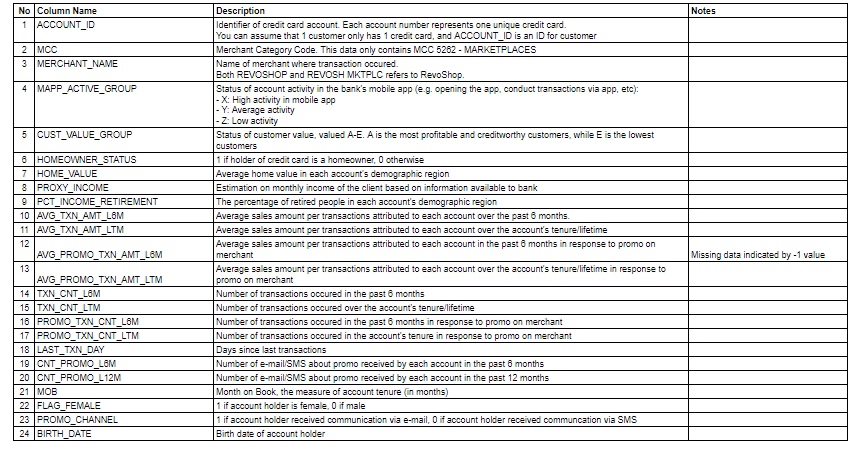

In [ ]:
# To prevent mistake from cleaning data or manipulating data keep the source data by copy them
df_revobank1 = df_revobank.copy()

## Info & Missing Values

In [ ]:
df_revobank1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 112634 entries, 0 to 112633
Data columns (total 24 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   ACCOUNT_ID             112634 non-null  int64  
 1   MCC                    112634 non-null  object 
 2   MERCHANT_NAME          112634 non-null  object 
 3   AVG_TXN_AMT_L6M        112634 non-null  float64
 4   AVG_TXN_AMT_LTM        112634 non-null  float64
 5   AVG_PROMO_TXN_AMT_L6M  112634 non-null  float64
 6   AVG_PROMO_TXN_AMT_LTM  112634 non-null  float64
 7   TXN_CNT_L6M            112634 non-null  float64
 8   TXN_CNT_LTM            112634 non-null  float64
 9   PROMO_TXN_CNT_L6M      112634 non-null  float64
 10  PROMO_TXN_CNT_LTM      112634 non-null  float64
 11  LAST_TXN_DAY           112634 non-null  float64
 12  CNT_PROMO_L6M          112634 non-null  float64
 13  CNT_PROMO_L12M         112634 non-null  float64
 14  CUST_VALUE_GROUP       112634 non-nu



*   From that info Birth_date columns still object data type not datetime type
*   No issue for null values in all columns but in column AVG_PROMO_TXN_AMT_L6M not null because missing values identified with -1 based on info from data dictionary



In [ ]:
#Filter missing values on columns AVG_PROMO_TXN_AMT_L6M
missing_data = df_revobank1[df_revobank1['AVG_PROMO_TXN_AMT_L6M'] == -1]
missing_data

,ACCOUNT_ID,MCC,MERCHANT_NAME,AVG_TXN_AMT_L6M,AVG_TXN_AMT_LTM,AVG_PROMO_TXN_AMT_L6M,AVG_PROMO_TXN_AMT_LTM,TXN_CNT_L6M,TXN_CNT_LTM,PROMO_TXN_CNT_L6M,PROMO_TXN_CNT_LTM,LAST_TXN_DAY,CNT_PROMO_L6M,CNT_PROMO_L12M,CUST_VALUE_GROUP,MAPP_ACTIVE_GROUP,HOMEOWNER_STATUS,HOME_VALUE,PROXY_INCOME,PCT_INCOME_RETIREMENT,MOB,FLAG_FEMALE,PROMO_CHANNEL,BIRTH_DATE
32,100000133,5262-MARKETPLACES,REVOSH MKTPLC,233.30,180.00,-1.00,100.00,4.00,9.00,1.00,2.00,17.00,7.00,29.00,A,X,0.00,347926.00,0.00,1.00,66.00,1.00,1.00,1985-12-21
82,100000302,5262-MARKETPLACES,REVOSH MKTPLC,250.00,185.60,-1.00,220.00,2.00,44.00,1.00,16.00,17.00,7.00,27.00,A,X,0.00,0.00,0.00,1.00,124.00,1.00,1.00,1982-02-24
104,100000357,5262-MARKETPLACES,REVOSH MKTPLC,140.00,102.50,-1.00,140.00,2.00,25.00,1.00,11.00,27.00,7.00,13.00,A,X,0.00,85733.00,67273.00,1.00,106.00,0.00,0.00,1983-08-22
117,100000387,5262-MARKETPLACES,REVOSH MKTPLC,250.00,240.70,-1.00,200.00,2.00,47.00,1.00,8.00,19.00,7.00,29.00,A,X,0.00,0.00,0.00,1.00,212.00,1.00,0.00,1983-11-21
166,100000591,5262-MARKETPLACES,REVOSH MKTPLC,110.00,79.50,-1.00,110.00,2.00,22.00,1.00,13.00,27.00,5.00,11.00,A,X,1.00,133906.00,47075.00,1.00,130.00,0.00,0.00,1977-04-18
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
112339,101057451,5262-MARKETPLACES,REVOSHOP,160.00,112.10,-1.00,160.00,2.00,15.00,1.00,10.00,27.00,5.00,10.00,E,X,0.00,15028.00,46247.00,46.00,124.00,1.00,0.00,1983-12-24
112368,101057690,5262-MARKETPLACES,REVOSHOP,225.00,325.00,-1.00,250.00,3.00,11.00,1.00,5.00,18.00,7.00,16.00,E,X,1.00,27511.00,30431.00,44.00,102.00,0.00,0.00,1981-04-23
112399,101057929,5262-MARKETPLACES,REVOSHOP,150.00,86.70,-1.00,100.00,3.00,13.00,1.00,7.00,11.00,5.00,19.00,E,X,1.00,33695.00,41835.00,36.00,106.00,1.00,0.00,1977-10-26
112479,101058836,5262-MARKETPLACES,REVOSHOP,100.00,73.30,-1.00,100.00,4.00,25.00,1.00,11.00,20.00,7.00,14.00,E,X,0.00,28398.00,0.00,26.00,122.00,1.00,1.00,1981-08-25


In [ ]:
#Must check percentage missing data from our data set
len(missing_data)/len(df_revobank1)*100

3.1216151428520695

Generally, if less than 5% of values are missing then it is acceptable to ignore them.

In [ ]:
#Filter to exclude missing values columns AVG_PROMO_TXN_AMT_L6M -1 from our dataset
df_revobank1 = df_revobank1[df_revobank1['AVG_PROMO_TXN_AMT_L6M'] != -1].copy()
df_revobank1

,ACCOUNT_ID,MCC,MERCHANT_NAME,AVG_TXN_AMT_L6M,AVG_TXN_AMT_LTM,AVG_PROMO_TXN_AMT_L6M,AVG_PROMO_TXN_AMT_LTM,TXN_CNT_L6M,TXN_CNT_LTM,PROMO_TXN_CNT_L6M,PROMO_TXN_CNT_LTM,LAST_TXN_DAY,CNT_PROMO_L6M,CNT_PROMO_L12M,CUST_VALUE_GROUP,MAPP_ACTIVE_GROUP,HOMEOWNER_STATUS,HOME_VALUE,PROXY_INCOME,PCT_INCOME_RETIREMENT,MOB,FLAG_FEMALE,PROMO_CHANNEL,BIRTH_DATE
0,100000004,5262-MARKETPLACES,REVOSH MKTPLC,216.00,201.00,200.00,250.00,5.00,21.00,2.00,7.00,15.00,9.00,19.00,A,X,0.00,90587.00,59785.00,32.00,123.00,1.00,0.00,1975-12-17
1,100000008,5262-MARKETPLACES,REVOSH MKTPLC,143.30,114.10,140.00,150.00,3.00,22.00,2.00,10.00,20.00,8.00,13.00,A,X,0.00,65814.00,32597.00,34.00,109.00,1.00,0.00,1991-12-27
2,100000012,5262-MARKETPLACES,REVOSH MKTPLC,263.30,242.70,400.00,290.00,4.00,12.00,2.00,4.00,16.00,12.00,27.00,A,X,0.00,42583.00,0.00,1.00,89.00,0.00,0.00,1970-03-22
3,100000014,5262-MARKETPLACES,REVOSH MKTPLC,235.60,210.00,242.90,300.00,8.00,27.00,6.00,13.00,20.00,9.00,18.00,A,X,0.00,61176.00,0.00,0.00,86.00,1.00,1.00,1983-11-26
4,100000015,5262-MARKETPLACES,REVOSH MKTPLC,98.00,77.50,97.50,90.00,5.00,44.00,4.00,21.00,25.00,8.00,18.00,A,X,0.00,44525.00,42253.00,22.00,124.00,1.00,0.00,1989-10-21
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
112629,101059843,5262-MARKETPLACES,REVOSHOP,120.00,113.40,120.00,200.00,3.00,22.00,1.00,5.00,8.00,4.00,30.00,E,Y,0.00,27087.00,35533.00,33.00,68.00,0.00,0.00,1993-07-14
112630,101059857,5262-MARKETPLACES,REVOSHOP,52.90,36.80,46.70,70.00,7.00,28.00,3.00,12.00,19.00,5.00,12.00,E,Y,0.00,26302.00,0.00,27.00,125.00,0.00,1.00,1980-02-19
112631,101059860,5262-MARKETPLACES,REVOSHOP,195.00,147.30,190.00,200.00,3.00,23.00,2.00,10.00,16.00,7.00,14.00,E,Y,1.00,70105.00,41249.00,63.00,116.00,1.00,0.00,1986-12-29
112632,101059866,5262-MARKETPLACES,REVOSHOP,84.00,64.40,85.00,50.00,5.00,25.00,4.00,16.00,16.00,2.00,7.00,E,Y,0.00,24294.00,0.00,30.00,112.00,0.00,0.00,1982-05-14


## Unique Values

In [ ]:
# To check values every columns in my dataset
for col in df_revobank1.columns:
  print(col) #to define columns name
  print(df_revobank1[col].value_counts()) #for values count each columns
  print('\n')

ACCOUNT_ID
100348692    2
100916285    2
100515122    2
100537136    2
100912879    2
            ..
100357142    1
100357127    1
100357125    1
100357121    1
101059869    1
Name: ACCOUNT_ID, Length: 108925, dtype: int64


MCC
5262-MARKETPLACES         109117
5311-DEPARTMENT STORES         1
Name: MCC, dtype: int64


MERCHANT_NAME
REVOSHOP           88319
REVOSH MKTPLC      19339
TOKTOKLIVE          1459
EL CORTE INGLES        1
Name: MERCHANT_NAME, dtype: int64


AVG_TXN_AMT_L6M
100.00    11491
150.00     3926
50.00      3757
110.00     3306
120.00     2767
          ...  
208.80        1
302.50        1
490.00        1
26.30         1
397.50        1
Name: AVG_TXN_AMT_L6M, Length: 1028, dtype: int64


AVG_TXN_AMT_LTM
100.00    812
50.00     692
80.00     621
90.00     615
70.00     551
         ... 
26.00       1
197.40      1
26.70       1
21.20       1
30.20       1
Name: AVG_TXN_AMT_LTM, Length: 2264, dtype: int64


AVG_PROMO_TXN_AMT_L6M
100.00    17677
50.00      6476
150.00   

Issues from the data:


*   Based on data dictionary columns MCC value must be "5262-MARKETPLACES" we can remove "5311-DEPARTMENT STORES"
*   And in column Merchant_Name we found REVOSHOP, REVOSH MKTPLC, TOKTOKLIVE, EL CORTE INGLES values. Just REVOSHOP and REVOSH MKTPLC related to RevoShop. We change REVOSH MKTPLC to REVOSHOP and delete TOKTOKLIVE, EL CORTE INGLES values because we want analyze data from REVOSHOP
*   And there is duplicate values on Account_ID



In [ ]:
# change REVOSH MKTPLC to REVOSHOP in column MERCHANT_NAME
df_revobank1['MERCHANT_NAME'].replace(["REVOSH MKTPLC"],'REVOSHOP', inplace = True)

In [ ]:
# check are value REVOSH MKTPLC still exist or not
df_revobank1['MERCHANT_NAME'].value_counts()

REVOSHOP           107658
TOKTOKLIVE           1459
EL CORTE INGLES         1
Name: MERCHANT_NAME, dtype: int64

In [ ]:
# Remove TOKTOKLIVE and EL CORTE INGLES values
df_revobank1 = df_revobank1[~df_revobank1['MERCHANT_NAME'].isin(["EL CORTE INGLES","TOKTOKLIVE"])]
df_revobank1['MERCHANT_NAME'].value_counts()

REVOSHOP    107658
Name: MERCHANT_NAME, dtype: int64

In [ ]:
# Remove 5311-DEPARTMENT STORES
df_revobank1 = df_revobank1[df_revobank1['MCC']!= '5311-DEPARTMENT STORES'].copy()
df_revobank1['MCC'].value_counts()

5262-MARKETPLACES    107658
Name: MCC, dtype: int64

## Duplicate Values

In [ ]:
df_revobank1[df_revobank1.duplicated()]

,ACCOUNT_ID,MCC,MERCHANT_NAME,AVG_TXN_AMT_L6M,AVG_TXN_AMT_LTM,AVG_PROMO_TXN_AMT_L6M,AVG_PROMO_TXN_AMT_LTM,TXN_CNT_L6M,TXN_CNT_LTM,PROMO_TXN_CNT_L6M,PROMO_TXN_CNT_LTM,LAST_TXN_DAY,CNT_PROMO_L6M,CNT_PROMO_L12M,CUST_VALUE_GROUP,MAPP_ACTIVE_GROUP,HOMEOWNER_STATUS,HOME_VALUE,PROXY_INCOME,PCT_INCOME_RETIREMENT,MOB,FLAG_FEMALE,PROMO_CHANNEL,BIRTH_DATE


In [ ]:
# check duplicate value in column "ACCOUNT_ID"
df_revobank1[df_revobank1['ACCOUNT_ID'].duplicated(keep = False)]

,ACCOUNT_ID,MCC,MERCHANT_NAME,AVG_TXN_AMT_L6M,AVG_TXN_AMT_LTM,AVG_PROMO_TXN_AMT_L6M,AVG_PROMO_TXN_AMT_LTM,TXN_CNT_L6M,TXN_CNT_LTM,PROMO_TXN_CNT_L6M,PROMO_TXN_CNT_LTM,LAST_TXN_DAY,CNT_PROMO_L6M,CNT_PROMO_L12M,CUST_VALUE_GROUP,MAPP_ACTIVE_GROUP,HOMEOWNER_STATUS,HOME_VALUE,PROXY_INCOME,PCT_INCOME_RETIREMENT,MOB,FLAG_FEMALE,PROMO_CHANNEL,BIRTH_DATE


Duplicate data was solved after we remove some values on column MCC and MERCHANT_NAME

##Date Time manipulation

In [ ]:
# change data type in birth_date column
df_revobank1['BIRTH_DATE'] = pd.to_datetime(df_revobank1['BIRTH_DATE'], format='%Y-%m-%d')

In [ ]:
df_revobank1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 107658 entries, 0 to 112632
Data columns (total 24 columns):
 #   Column                 Non-Null Count   Dtype         
---  ------                 --------------   -----         
 0   ACCOUNT_ID             107658 non-null  int64         
 1   MCC                    107658 non-null  object        
 2   MERCHANT_NAME          107658 non-null  object        
 3   AVG_TXN_AMT_L6M        107658 non-null  float64       
 4   AVG_TXN_AMT_LTM        107658 non-null  float64       
 5   AVG_PROMO_TXN_AMT_L6M  107658 non-null  float64       
 6   AVG_PROMO_TXN_AMT_LTM  107658 non-null  float64       
 7   TXN_CNT_L6M            107658 non-null  float64       
 8   TXN_CNT_LTM            107658 non-null  float64       
 9   PROMO_TXN_CNT_L6M      107658 non-null  float64       
 10  PROMO_TXN_CNT_LTM      107658 non-null  float64       
 11  LAST_TXN_DAY           107658 non-null  float64       
 12  CNT_PROMO_L6M          107658 non-null  floa

In [ ]:
# calculate age of customer based on data in column birth_date
specific_date = pd.to_datetime('2023-01-31')
df_revobank1['AGE'] = (specific_date - df_revobank1['BIRTH_DATE']).astype('<m8[Y]')
df_revobank1.head()

,ACCOUNT_ID,MCC,MERCHANT_NAME,AVG_TXN_AMT_L6M,AVG_TXN_AMT_LTM,AVG_PROMO_TXN_AMT_L6M,AVG_PROMO_TXN_AMT_LTM,TXN_CNT_L6M,TXN_CNT_LTM,PROMO_TXN_CNT_L6M,PROMO_TXN_CNT_LTM,LAST_TXN_DAY,CNT_PROMO_L6M,CNT_PROMO_L12M,CUST_VALUE_GROUP,MAPP_ACTIVE_GROUP,HOMEOWNER_STATUS,HOME_VALUE,PROXY_INCOME,PCT_INCOME_RETIREMENT,MOB,FLAG_FEMALE,PROMO_CHANNEL,BIRTH_DATE,AGE
0,100000004,5262-MARKETPLACES,REVOSHOP,216.00,201.00,200.00,250.00,5.00,21.00,2.00,7.00,15.00,9.00,19.00,A,X,0.00,90587.00,59785.00,32.00,123.00,1.00,0.00,1975-12-17,47.00
1,100000008,5262-MARKETPLACES,REVOSHOP,143.30,114.10,140.00,150.00,3.00,22.00,2.00,10.00,20.00,8.00,13.00,A,X,0.00,65814.00,32597.00,34.00,109.00,1.00,0.00,1991-12-27,31.00
2,100000012,5262-MARKETPLACES,REVOSHOP,263.30,242.70,400.00,290.00,4.00,12.00,2.00,4.00,16.00,12.00,27.00,A,X,0.00,42583.00,0.00,1.00,89.00,0.00,0.00,1970-03-22,52.00
3,100000014,5262-MARKETPLACES,REVOSHOP,235.60,210.00,242.90,300.00,8.00,27.00,6.00,13.00,20.00,9.00,18.00,A,X,0.00,61176.00,0.00,0.00,86.00,1.00,1.00,1983-11-26,39.00
4,100000015,5262-MARKETPLACES,REVOSHOP,98.00,77.50,97.50,90.00,5.00,44.00,4.00,21.00,25.00,8.00,18.00,A,X,0.00,44525.00,42253.00,22.00,124.00,1.00,0.00,1989-10-21,33.00


In [ ]:
# calculate age group
df_revobank1['AGE'] = df_revobank1['AGE'].astype(int)

conditions = [df_revobank1['AGE']>57,
              df_revobank1['AGE']>48,
              df_revobank1['AGE']>24,
              df_revobank1['AGE']<=24
              ]
values = ['Baby Boomers', 'Gen X', 'Millenials', 'Gen Z']

df_revobank1['AGE_GROUP'] = np.select(conditions,values)
df_revobank1.head()

,ACCOUNT_ID,MCC,MERCHANT_NAME,AVG_TXN_AMT_L6M,AVG_TXN_AMT_LTM,AVG_PROMO_TXN_AMT_L6M,AVG_PROMO_TXN_AMT_LTM,TXN_CNT_L6M,TXN_CNT_LTM,PROMO_TXN_CNT_L6M,PROMO_TXN_CNT_LTM,LAST_TXN_DAY,CNT_PROMO_L6M,CNT_PROMO_L12M,CUST_VALUE_GROUP,MAPP_ACTIVE_GROUP,HOMEOWNER_STATUS,HOME_VALUE,PROXY_INCOME,PCT_INCOME_RETIREMENT,MOB,FLAG_FEMALE,PROMO_CHANNEL,BIRTH_DATE,AGE,AGE_GROUP
0,100000004,5262-MARKETPLACES,REVOSHOP,216.00,201.00,200.00,250.00,5.00,21.00,2.00,7.00,15.00,9.00,19.00,A,X,0.00,90587.00,59785.00,32.00,123.00,1.00,0.00,1975-12-17,47,Millenials
1,100000008,5262-MARKETPLACES,REVOSHOP,143.30,114.10,140.00,150.00,3.00,22.00,2.00,10.00,20.00,8.00,13.00,A,X,0.00,65814.00,32597.00,34.00,109.00,1.00,0.00,1991-12-27,31,Millenials
2,100000012,5262-MARKETPLACES,REVOSHOP,263.30,242.70,400.00,290.00,4.00,12.00,2.00,4.00,16.00,12.00,27.00,A,X,0.00,42583.00,0.00,1.00,89.00,0.00,0.00,1970-03-22,52,Gen X
3,100000014,5262-MARKETPLACES,REVOSHOP,235.60,210.00,242.90,300.00,8.00,27.00,6.00,13.00,20.00,9.00,18.00,A,X,0.00,61176.00,0.00,0.00,86.00,1.00,1.00,1983-11-26,39,Millenials
4,100000015,5262-MARKETPLACES,REVOSHOP,98.00,77.50,97.50,90.00,5.00,44.00,4.00,21.00,25.00,8.00,18.00,A,X,0.00,44525.00,42253.00,22.00,124.00,1.00,0.00,1989-10-21,33,Millenials


In [ ]:
# Create a column to identify promo-sensitive customers for L6M
df_revobank1['TOTAL_PROMO_SALES_L6M'] = (df_revobank1['AVG_PROMO_TXN_AMT_L6M'] * df_revobank1['PROMO_TXN_CNT_L6M'])
df_revobank1['TOTAL_SALES_L6M'] = (df_revobank1['AVG_TXN_AMT_L6M'] * df_revobank1['TXN_CNT_L6M'])
df_revobank1['PROMO_SENSITIVE_CUSTOMER'] = (df_revobank1['TOTAL_PROMO_SALES_L6M'] > (0.5 * df_revobank1['TOTAL_SALES_L6M'])).astype(int)

# Create a column to identify promo-sensitive customers for Lifetime
df_revobank1['TOTAL_PROMO_SALES_LTM'] = (df_revobank1['AVG_PROMO_TXN_AMT_LTM'] * df_revobank1['PROMO_TXN_CNT_LTM'])
df_revobank1['TOTAL_SALES_LTM'] = (df_revobank1['AVG_TXN_AMT_LTM'] * df_revobank1['TXN_CNT_LTM'])
df_revobank1['PROMO_SENSITIVE_CUSTOMER_LTM'] = (df_revobank1['TOTAL_PROMO_SALES_LTM'] > (0.5 * df_revobank1['TOTAL_SALES_LTM'])).astype(int)
df_revobank1.head()

,ACCOUNT_ID,MCC,MERCHANT_NAME,AVG_TXN_AMT_L6M,AVG_TXN_AMT_LTM,AVG_PROMO_TXN_AMT_L6M,AVG_PROMO_TXN_AMT_LTM,TXN_CNT_L6M,TXN_CNT_LTM,PROMO_TXN_CNT_L6M,PROMO_TXN_CNT_LTM,LAST_TXN_DAY,CNT_PROMO_L6M,CNT_PROMO_L12M,CUST_VALUE_GROUP,MAPP_ACTIVE_GROUP,HOMEOWNER_STATUS,HOME_VALUE,PROXY_INCOME,PCT_INCOME_RETIREMENT,MOB,FLAG_FEMALE,PROMO_CHANNEL,BIRTH_DATE,AGE,AGE_GROUP,TOTAL_PROMO_SALES_L6M,TOTAL_SALES_L6M,PROMO_SENSITIVE_CUSTOMER,TOTAL_PROMO_SALES_LTM,TOTAL_SALES_LTM,PROMO_SENSITIVE_CUSTOMER_LTM
0,100000004,5262-MARKETPLACES,REVOSHOP,216.00,201.00,200.00,250.00,5.00,21.00,2.00,7.00,15.00,9.00,19.00,A,X,0.00,90587.00,59785.00,32.00,123.00,1.00,0.00,1975-12-17,47,Millenials,400.00,1080.00,0,1750.00,4221.00,0
1,100000008,5262-MARKETPLACES,REVOSHOP,143.30,114.10,140.00,150.00,3.00,22.00,2.00,10.00,20.00,8.00,13.00,A,X,0.00,65814.00,32597.00,34.00,109.00,1.00,0.00,1991-12-27,31,Millenials,280.00,429.90,1,1500.00,2510.20,1
2,100000012,5262-MARKETPLACES,REVOSHOP,263.30,242.70,400.00,290.00,4.00,12.00,2.00,4.00,16.00,12.00,27.00,A,X,0.00,42583.00,0.00,1.00,89.00,0.00,0.00,1970-03-22,52,Gen X,800.00,1053.20,1,1160.00,2912.40,0
3,100000014,5262-MARKETPLACES,REVOSHOP,235.60,210.00,242.90,300.00,8.00,27.00,6.00,13.00,20.00,9.00,18.00,A,X,0.00,61176.00,0.00,0.00,86.00,1.00,1.00,1983-11-26,39,Millenials,1457.40,1884.80,1,3900.00,5670.00,1
4,100000015,5262-MARKETPLACES,REVOSHOP,98.00,77.50,97.50,90.00,5.00,44.00,4.00,21.00,25.00,8.00,18.00,A,X,0.00,44525.00,42253.00,22.00,124.00,1.00,0.00,1989-10-21,33,Millenials,390.00,490.00,1,1890.00,3410.00,1


#EDA

Key insight promo performance for 6 month

##Descriptive Statistic

In [ ]:
df_revobank2 = df_revobank1.copy()

###How many RevoShop customers do we have in the data?

In [ ]:
total_customers = df_revobank2['ACCOUNT_ID'].nunique()
print("Total number of RevoShop customers:", total_customers)

Total number of RevoShop customers: 107658


###What are the customer demographics in the dataset?

####Age

,AGE
count,107658.00
mean,39.97
std,5.66
min,17.00
25%,36.00
50%,40.00
75%,44.00
max,65.00


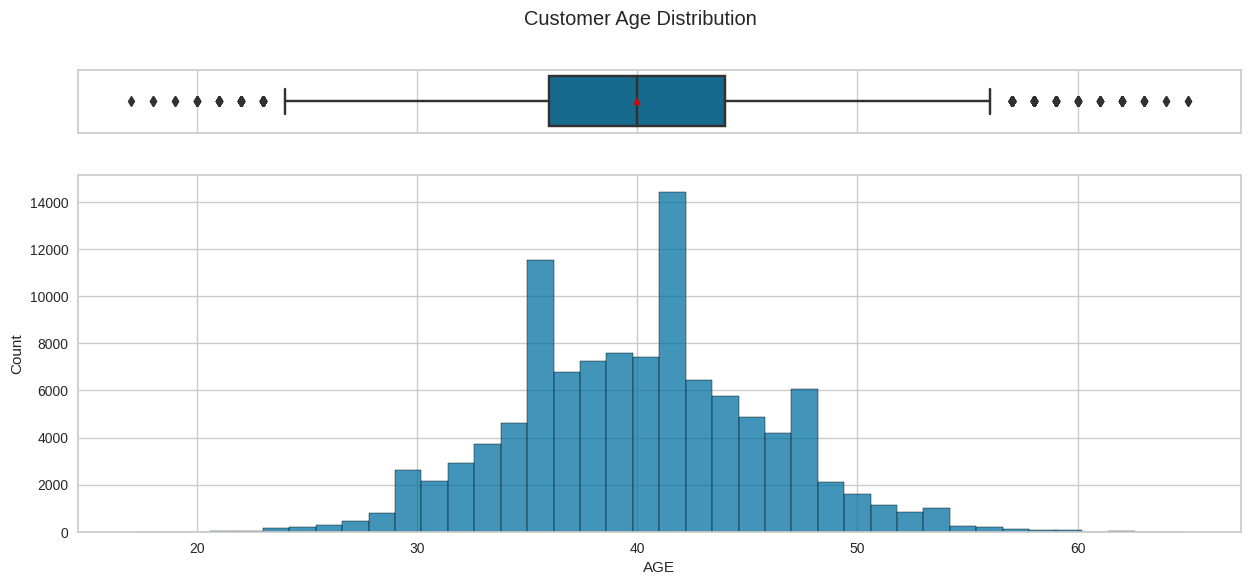

In [ ]:
# display table distribution
display(df_revobank2[['AGE']].describe())

fig, ax = plt.subplots(2, sharex = True, figsize = (15,6), gridspec_kw={'height_ratios':(.15,.85)})

# add a graph
sns.boxplot(x=df_revobank2['AGE'], showmeans=True, ax=ax[0])
sns.histplot(df_revobank2['AGE'],bins=40,ax=ax[1])

# remove x axis name for boxplot
ax[0].set(xlabel='')

plt.suptitle('Customer Age Distribution')
plt.show()

In [ ]:
age_gen = pd.DataFrame(df_revobank2['AGE_GROUP'].value_counts(normalize=True))
age_gen

,AGE_GROUP
Millenials,0.93
Gen X,0.07
Gen Z,0.00
Baby Boomers,0.00


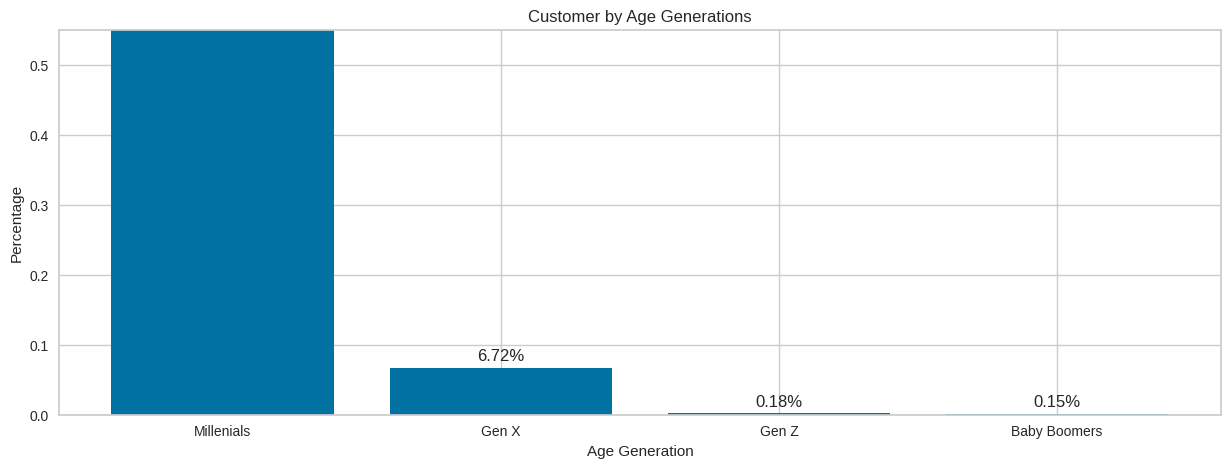

In [ ]:
# define the canvas
fig = plt.figure(figsize=(15,5))

axl = plt.bar(age_gen.index,age_gen['AGE_GROUP'])
plt.bar_label (axl, padding=3, fmt='{:.2%}')

plt.title('Customer by Age Generations')
plt.xlabel('Age Generation')
plt.ylabel('Percentage')

plt.ylim(0,0.55)

plt.show()



*   Based on our data, most of our cust have age between 37 and 44 or ~40.5 by average
*  By Generation, Millenials and Gen X dominate our customers



####Gender

In [ ]:
gender_distribution = pd.DataFrame(df_revobank2['FLAG_FEMALE'].value_counts())
print("Gender distribution of customers:")
gender_distribution



Gender distribution of customers:


,FLAG_FEMALE
1.00,63035
0.00,44623


In [ ]:
gender_distribution.index = ['Female','Male']
gender_distribution

,FLAG_FEMALE
Female,63035
Male,44623


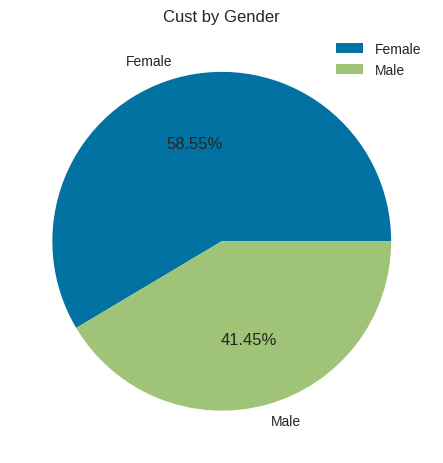

In [ ]:
plt.pie(x=gender_distribution['FLAG_FEMALE'],labels=gender_distribution.index,autopct='%.2f%%')

plt.title('Cust by Gender')
plt.legend()

plt.show()



*   Female dominate our customers by 58.55%



####MOB

,MOB
count,107658.00
mean,101.20
std,25.65
min,21.00
25%,81.00
50%,105.00
75%,125.00
max,570.00


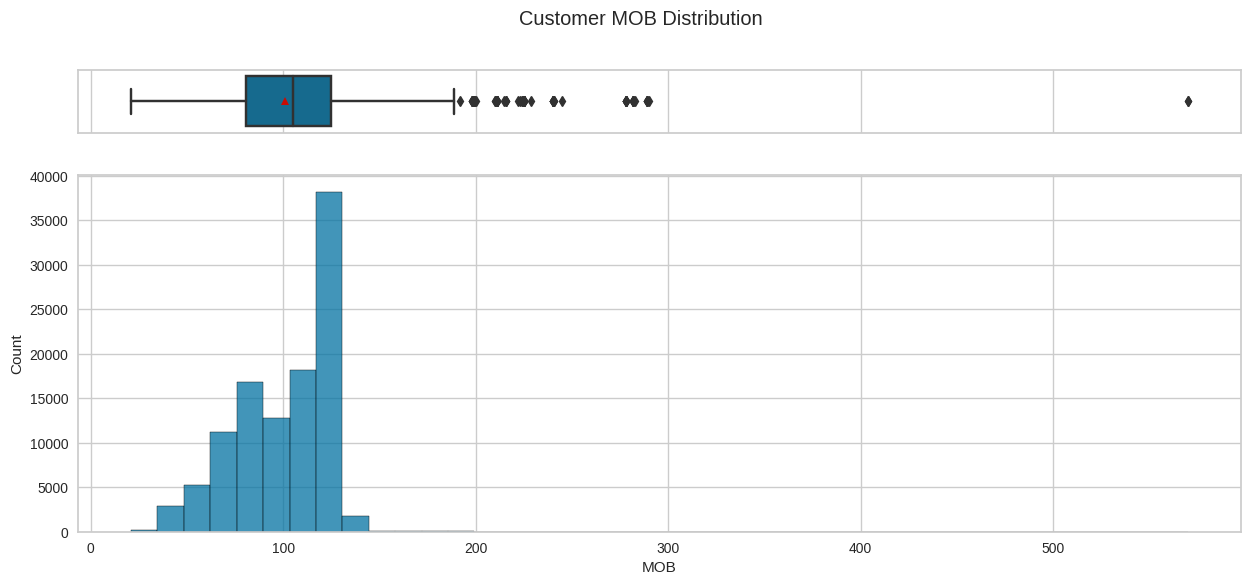

In [ ]:
# display table distribution
display(df_revobank2[['MOB']].describe())

fig, ax = plt.subplots(2, sharex = True, figsize = (15,6), gridspec_kw={'height_ratios':(.15,.85)})

# add a graph
sns.boxplot(x=df_revobank2['MOB'], showmeans=True, ax=ax[0])
sns.histplot(df_revobank2['MOB'],bins=40,ax=ax[1])

# remove x axis name for boxplot
ax[0].set(xlabel='')

plt.suptitle('Customer MOB Distribution')
plt.show()

Most our cust registered 100 month ago

###How much total sales have been generated in RevoShop over the past 6 months?

In [ ]:
total_sales_l6m = df_revobank2['TOTAL_SALES_L6M'].sum()
print("Total sales generated in RevoShop over the past 6 months:", total_sales_l6m)

Total sales generated in RevoShop over the past 6 months: 56639218.9


###How many sales were made in response to the promo in the last 6 months?

In [ ]:
total_promo_sales_l6m = df_revobank2['TOTAL_PROMO_SALES_L6M'].sum()
print("Total sales made in response to the promo in the last 6 months:", total_promo_sales_l6m)

Total sales made in response to the promo in the last 6 months: 35208915.89999999


###What percentage of total sales at RevoShop is attributed to the promo in the past 6 months?

In [ ]:
promo_sales_percentage_l6m = (total_promo_sales_l6m / total_sales_l6m) * 100
print("Percentage of total sales attributed to the promo in the past 6 months:", promo_sales_percentage_l6m)

Percentage of total sales attributed to the promo in the past 6 months: 62.16349127653664


###What is the average number of transactions per customer in their lifetime and over the past 6 months?

In [ ]:
# Calculate the average number of transactions per customer in their lifetime
average_txn_per_customer_lifetime = df_revobank2['TXN_CNT_LTM'].mean()

# Calculate the average number of transactions per customer over the past 6 months
average_txn_per_customer_l6m = df_revobank2['TXN_CNT_L6M'].mean()

print("Average number of transactions per customer in their lifetime:", average_txn_per_customer_lifetime)
print("Average number of transactions per customer over the past 6 months:", average_txn_per_customer_l6m)

Average number of transactions per customer in their lifetime: 20.158074643779376
Average number of transactions per customer over the past 6 months: 4.524484943060432


###What is the total cost of the promotion over the past 6 months?

In [ ]:
# Calculate the total cost of the promotion over the past 6 months
total_promo_cost_l6m = df_revobank2['PROMO_TXN_CNT_L6M'].sum() * 1.5

print("Total cost of the promotion over the past 6 months (in euros):", total_promo_cost_l6m)

Total cost of the promotion over the past 6 months (in euros): 456100.5


###What is the total revenue generated by the promo in the past 6 months?

In [ ]:
# Calculate the total revenue generated by the promo in the past 6 months
total_promo_revenue_l6m = df_revobank2['TOTAL_PROMO_SALES_L6M'].sum() * 0.024

print("Total revenue generated by the promo in the past 6 months (in euros):", total_promo_revenue_l6m)

Total revenue generated by the promo in the past 6 months (in euros): 845013.9815999998


###How many customers are considered promo-sensitive?

In [ ]:
# Count the number of promo-sensitive customers
promo_sensitive_customers = df_revobank2[df_revobank2['PROMO_SENSITIVE_CUSTOMER'] == 1]
num_promo_sensitive_customers = len(promo_sensitive_customers)

print("Number of promo-sensitive customers:", num_promo_sensitive_customers)

Number of promo-sensitive customers: 72091


##Trend Analysis

###Is there any difference in transaction behavior and promo sensitivity between active and inactive customers in the past 6 months?

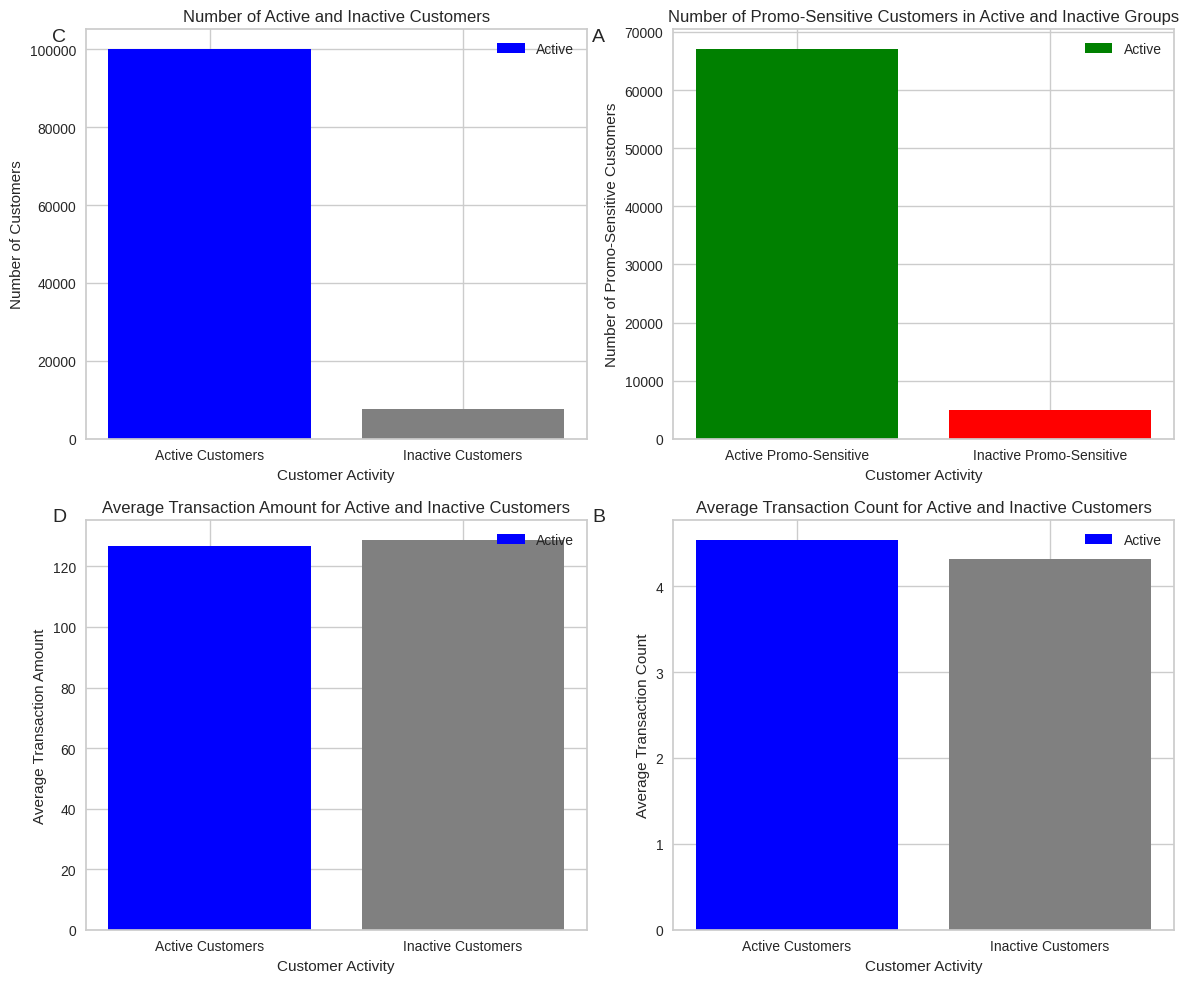

In [ ]:
# Assuming 'MAPP_ACTIVE_GROUP' contains values X, Y, Z for High, Average, and Low activity respectively
# Separate active and inactive customers
active_customers = df_revobank2[df_revobank2['MAPP_ACTIVE_GROUP'] == 'X']
inactive_customers = df_revobank2[df_revobank2['MAPP_ACTIVE_GROUP'] != 'X']

# Calculate the number of customers and promo-sensitive customers in each group
num_active_customers = len(active_customers)
num_inactive_customers = len(inactive_customers)

active_promo_sensitive_customers = active_customers[active_customers['PROMO_SENSITIVE_CUSTOMER'] == 1]
num_active_promo_sensitive_customers = len(active_promo_sensitive_customers)

inactive_promo_sensitive_customers = inactive_customers[inactive_customers['PROMO_SENSITIVE_CUSTOMER'] == 1]
num_inactive_promo_sensitive_customers = len(inactive_promo_sensitive_customers)

# Calculate the average transaction amount and average transaction count per customer in each group
average_txn_amount_active = active_customers['AVG_TXN_AMT_L6M'].mean()
average_txn_amount_inactive = inactive_customers['AVG_TXN_AMT_L6M'].mean()

average_txn_count_active = active_customers['TXN_CNT_L6M'].mean()
average_txn_count_inactive = inactive_customers['TXN_CNT_L6M'].mean()

# Create a 2x2 grid of subplots
plt.figure(figsize=(12, 10))

# Subplot 1: Number of active and inactive customers
plt.subplot(2, 2, 1)
labels = ['Active Customers', 'Inactive Customers']
counts = [num_active_customers, num_inactive_customers]
plt.bar(labels, counts, color=['blue', 'gray'])
plt.xlabel('Customer Activity')
plt.ylabel('Number of Customers')
plt.title('Number of Active and Inactive Customers')
plt.legend(['Active', 'Inactive'])

# Subplot 2: Number of promo-sensitive customers in active and inactive groups
plt.subplot(2, 2, 2)
labels = ['Active Promo-Sensitive', 'Inactive Promo-Sensitive']
counts = [num_active_promo_sensitive_customers, num_inactive_promo_sensitive_customers]
plt.bar(labels, counts, color=['green', 'red'])
plt.xlabel('Customer Activity')
plt.ylabel('Number of Promo-Sensitive Customers')
plt.title('Number of Promo-Sensitive Customers in Active and Inactive Groups')
plt.legend(['Active', 'Inactive'])

# Subplot 3: Average transaction amount for active and inactive customers
plt.subplot(2, 2, 3)
labels = ['Active Customers', 'Inactive Customers']
average_txn_amounts = [average_txn_amount_active, average_txn_amount_inactive]
plt.bar(labels, average_txn_amounts, color=['blue', 'gray'])
plt.xlabel('Customer Activity')
plt.ylabel('Average Transaction Amount')
plt.title('Average Transaction Amount for Active and Inactive Customers')
plt.legend(['Active', 'Inactive'])

# Subplot 4: Average transaction count for active and inactive customers
plt.subplot(2, 2, 4)
labels = ['Active Customers', 'Inactive Customers']
average_txn_counts = [average_txn_count_active, average_txn_count_inactive]
plt.bar(labels, average_txn_counts, color=['blue', 'gray'])
plt.xlabel('Customer Activity')
plt.ylabel('Average Transaction Count')
plt.title('Average Transaction Count for Active and Inactive Customers')
plt.legend(['Active', 'Inactive'])

# Adjust the layout to prevent overlapping of subplots
plt.tight_layout()

# Add labels to each subplot
plt.text(0.5, 0.95, 'A', fontsize=14, transform=plt.gcf().transFigure)
plt.text(0.5, 0.47, 'B', fontsize=14, transform=plt.gcf().transFigure)
plt.text(0.05, 0.95, 'C', fontsize=14, transform=plt.gcf().transFigure)
plt.text(0.05, 0.47, 'D', fontsize=14, transform=plt.gcf().transFigure)

# Show all the subplots
plt.show()


###Is There any difference in transaction behavior and promo sensitivity between high-value and lower value customers in the past 6 Month?

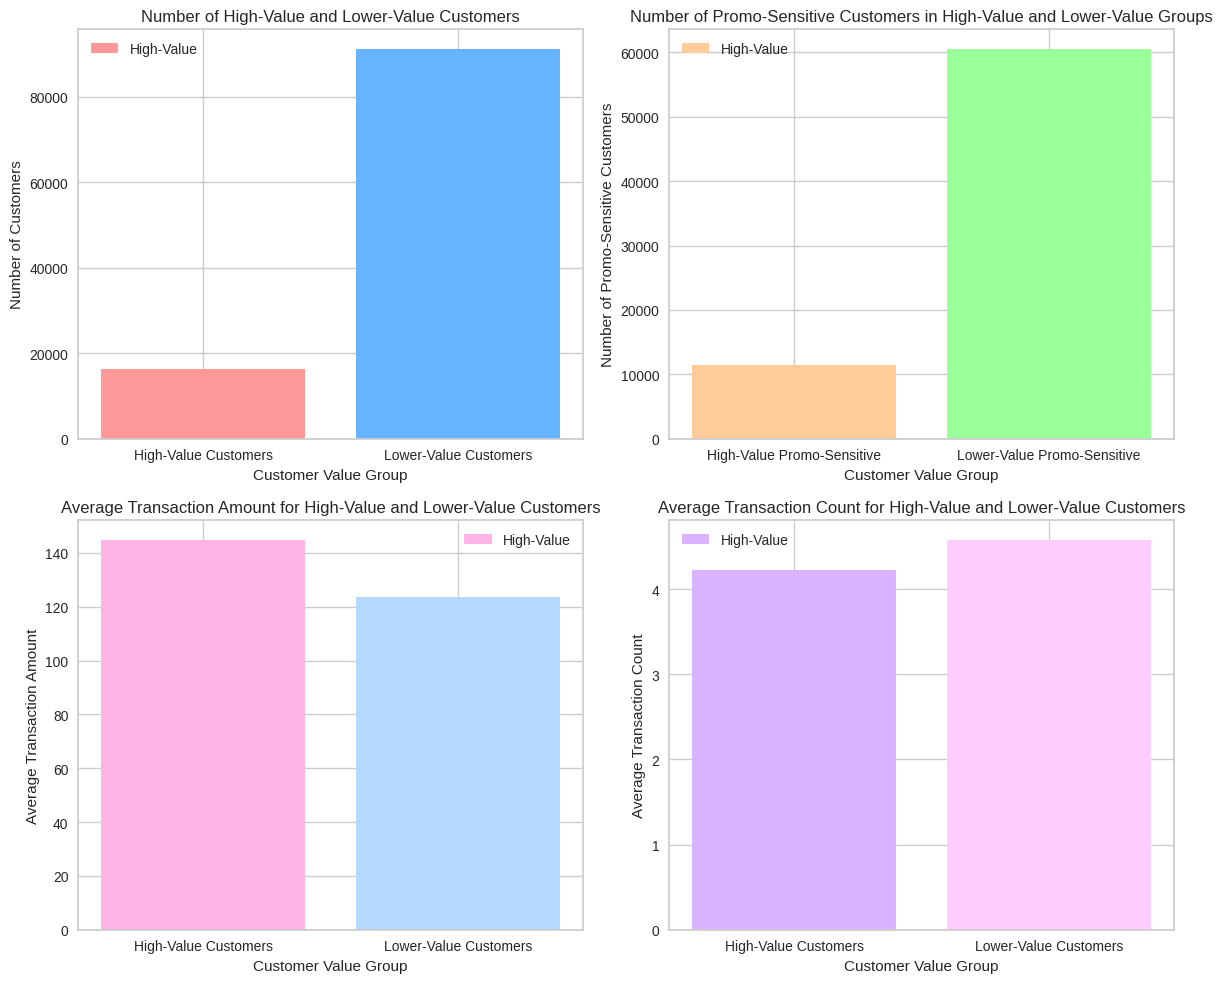

In [ ]:
# Assuming 'CUST_VALUE_GROUP' contains values A-E for customer value groups
# Separate high-value and lower-value customers
high_value_customers = df_revobank2[df_revobank2['CUST_VALUE_GROUP'] == 'A']
lower_value_customers = df_revobank2[df_revobank2['CUST_VALUE_GROUP'] != 'A']

# Calculate the number of customers and promo-sensitive customers in each group
num_high_value_customers = len(high_value_customers)
num_lower_value_customers = len(lower_value_customers)

high_value_promo_sensitive_customers = high_value_customers[high_value_customers['PROMO_SENSITIVE_CUSTOMER'] == 1]
num_high_value_promo_sensitive_customers = len(high_value_promo_sensitive_customers)

lower_value_promo_sensitive_customers = lower_value_customers[lower_value_customers['PROMO_SENSITIVE_CUSTOMER'] == 1]
num_lower_value_promo_sensitive_customers = len(lower_value_promo_sensitive_customers)

# Calculate the average transaction amount and average transaction count per customer in each group
average_txn_amount_high_value = high_value_customers['AVG_TXN_AMT_L6M'].mean()
average_txn_amount_lower_value = lower_value_customers['AVG_TXN_AMT_L6M'].mean()

average_txn_count_high_value = high_value_customers['TXN_CNT_L6M'].mean()
average_txn_count_lower_value = lower_value_customers['TXN_CNT_L6M'].mean()

# Create a 2x2 grid of subplots
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(12, 10))

# Subplot 1: Number of high-value and lower-value customers
labels = ['High-Value Customers', 'Lower-Value Customers']
counts = [num_high_value_customers, num_lower_value_customers]
axes[0, 0].bar(labels, counts, color=['#ff9999', '#66b3ff'])
axes[0, 0].set_xlabel('Customer Value Group')
axes[0, 0].set_ylabel('Number of Customers')
axes[0, 0].set_title('Number of High-Value and Lower-Value Customers')
axes[0, 0].legend(['High-Value', 'Lower-Value'])

# Subplot 2: Number of promo-sensitive customers in high-value and lower-value groups
labels = ['High-Value Promo-Sensitive', 'Lower-Value Promo-Sensitive']
counts = [num_high_value_promo_sensitive_customers, num_lower_value_promo_sensitive_customers]
axes[0, 1].bar(labels, counts, color=['#ffcc99', '#99ff99'])
axes[0, 1].set_xlabel('Customer Value Group')
axes[0, 1].set_ylabel('Number of Promo-Sensitive Customers')
axes[0, 1].set_title('Number of Promo-Sensitive Customers in High-Value and Lower-Value Groups')
axes[0, 1].legend(['High-Value', 'Lower-Value'])

# Subplot 3: Average transaction amount for high-value and lower-value customers
labels = ['High-Value Customers', 'Lower-Value Customers']
average_txn_amounts = [average_txn_amount_high_value, average_txn_amount_lower_value]
axes[1, 0].bar(labels, average_txn_amounts, color=['#ffb3e6', '#b3d9ff'])
axes[1, 0].set_xlabel('Customer Value Group')
axes[1, 0].set_ylabel('Average Transaction Amount')
axes[1, 0].set_title('Average Transaction Amount for High-Value and Lower-Value Customers')
axes[1, 0].legend(['High-Value', 'Lower-Value'])

# Subplot 4: Average transaction count for high-value and lower-value customers
labels = ['High-Value Customers', 'Lower-Value Customers']
average_txn_counts = [average_txn_count_high_value, average_txn_count_lower_value]
axes[1, 1].bar(labels, average_txn_counts, color=['#d9b3ff', '#ffccff'])
axes[1, 1].set_xlabel('Customer Value Group')
axes[1, 1].set_ylabel('Average Transaction Count')
axes[1, 1].set_title('Average Transaction Count for High-Value and Lower-Value Customers')
axes[1, 1].legend(['High-Value', 'Lower-Value'])

# Adjust the layout to prevent overlapping of subplots
plt.tight_layout()

# Show all the subplots
plt.show()

###Is there a relationship between increasing the number of email and SMS messages and improved sales performance?

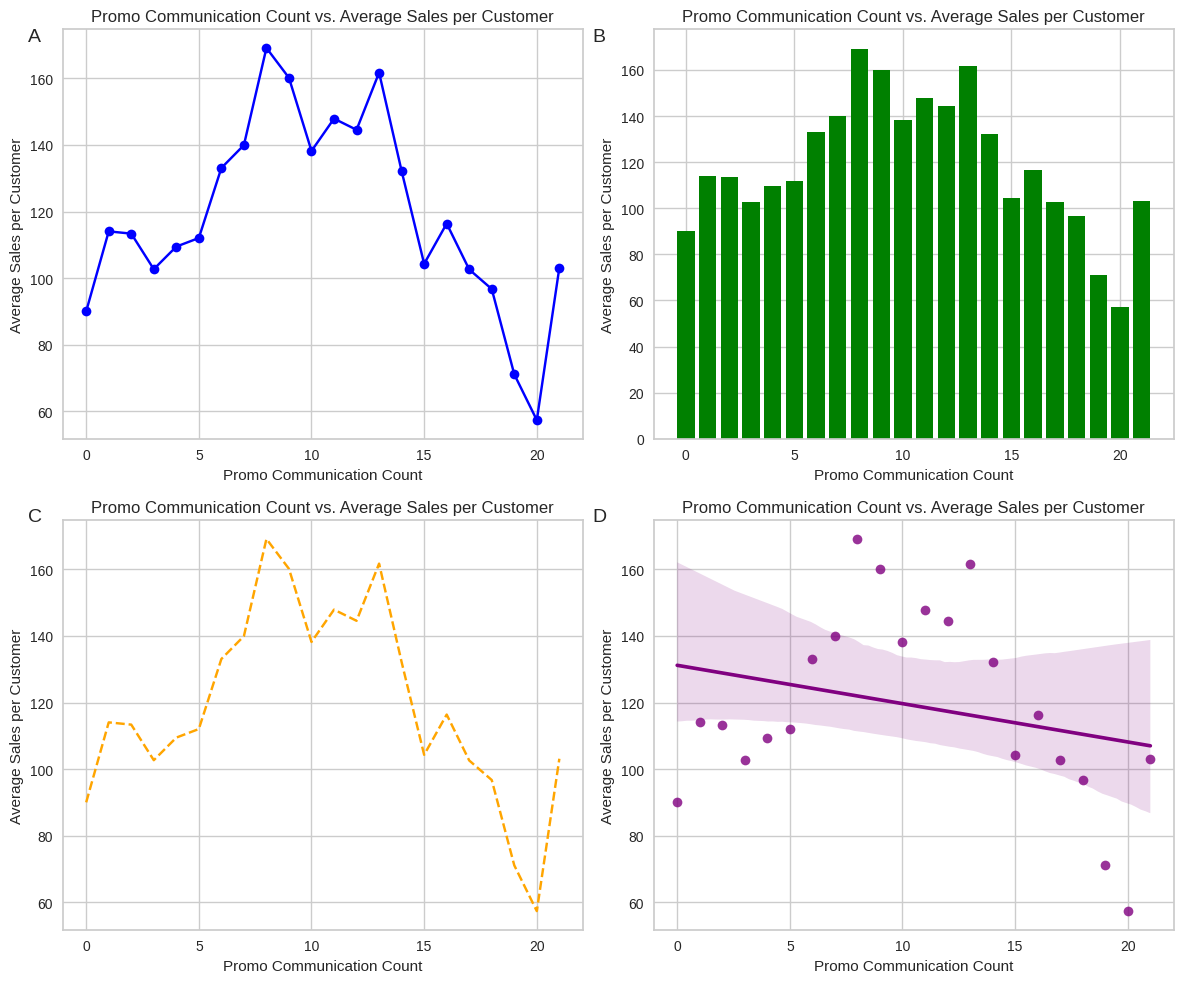

In [ ]:
# Group the data by promo communication count and calculate the average sales per customer in each group
promo_communication_groups = df_revobank2.groupby('CNT_PROMO_L6M')['AVG_TXN_AMT_L6M'].mean().reset_index()

# Create a 2x2 grid of subplots
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(12, 10))

# Subplot 1: Scatter plot of promo communication count vs. average sales per customer
axes[0, 0].plot(promo_communication_groups['CNT_PROMO_L6M'], promo_communication_groups['AVG_TXN_AMT_L6M'], marker='o', color='blue')
axes[0, 0].set_xlabel('Promo Communication Count')
axes[0, 0].set_ylabel('Average Sales per Customer')
axes[0, 0].set_title('Promo Communication Count vs. Average Sales per Customer')

# Subplot 2: Bar plot of promo communication count vs. average sales per customer
axes[0, 1].bar(promo_communication_groups['CNT_PROMO_L6M'], promo_communication_groups['AVG_TXN_AMT_L6M'], color='green')
axes[0, 1].set_xlabel('Promo Communication Count')
axes[0, 1].set_ylabel('Average Sales per Customer')
axes[0, 1].set_title('Promo Communication Count vs. Average Sales per Customer')

# Subplot 3: Line plot of promo communication count vs. average sales per customer
axes[1, 0].plot(promo_communication_groups['CNT_PROMO_L6M'], promo_communication_groups['AVG_TXN_AMT_L6M'], linestyle='dashed', color='orange')
axes[1, 0].set_xlabel('Promo Communication Count')
axes[1, 0].set_ylabel('Average Sales per Customer')
axes[1, 0].set_title('Promo Communication Count vs. Average Sales per Customer')

# Subplot 4: Scatter plot of promo communication count vs. average sales per customer with regression line
import seaborn as sns
sns.regplot(x='CNT_PROMO_L6M', y='AVG_TXN_AMT_L6M', data=promo_communication_groups, ax=axes[1, 1], color='purple')
axes[1, 1].set_xlabel('Promo Communication Count')
axes[1, 1].set_ylabel('Average Sales per Customer')
axes[1, 1].set_title('Promo Communication Count vs. Average Sales per Customer')

# Adjust the layout to prevent overlapping of subplots
plt.tight_layout()

# Add labels to each subplot
plt.text(0.03, 0.95, 'A', fontsize=14, transform=plt.gcf().transFigure)
plt.text(0.5, 0.95, 'B', fontsize=14, transform=plt.gcf().transFigure)
plt.text(0.03, 0.47, 'C', fontsize=14, transform=plt.gcf().transFigure)
plt.text(0.5, 0.47, 'D', fontsize=14, transform=plt.gcf().transFigure)

# Show all the subplots
plt.show()

##[Milestone_2] Apply clustering methods fo form segments

In [ ]:
df_revobank3 = df_revobank2.select_dtypes(include='number').copy()
df_revobank3

,ACCOUNT_ID,AVG_TXN_AMT_L6M,AVG_TXN_AMT_LTM,AVG_PROMO_TXN_AMT_L6M,AVG_PROMO_TXN_AMT_LTM,TXN_CNT_L6M,TXN_CNT_LTM,PROMO_TXN_CNT_L6M,PROMO_TXN_CNT_LTM,LAST_TXN_DAY,CNT_PROMO_L6M,CNT_PROMO_L12M,HOMEOWNER_STATUS,HOME_VALUE,PROXY_INCOME,PCT_INCOME_RETIREMENT,MOB,FLAG_FEMALE,PROMO_CHANNEL,AGE,TOTAL_PROMO_SALES_L6M,TOTAL_SALES_L6M,PROMO_SENSITIVE_CUSTOMER,TOTAL_PROMO_SALES_LTM,TOTAL_SALES_LTM,PROMO_SENSITIVE_CUSTOMER_LTM
0,100000004,216.00,201.00,200.00,250.00,5.00,21.00,2.00,7.00,15.00,9.00,19.00,0.00,90587.00,59785.00,32.00,123.00,1.00,0.00,47,400.00,1080.00,0,1750.00,4221.00,0
1,100000008,143.30,114.10,140.00,150.00,3.00,22.00,2.00,10.00,20.00,8.00,13.00,0.00,65814.00,32597.00,34.00,109.00,1.00,0.00,31,280.00,429.90,1,1500.00,2510.20,1
2,100000012,263.30,242.70,400.00,290.00,4.00,12.00,2.00,4.00,16.00,12.00,27.00,0.00,42583.00,0.00,1.00,89.00,0.00,0.00,52,800.00,1053.20,1,1160.00,2912.40,0
3,100000014,235.60,210.00,242.90,300.00,8.00,27.00,6.00,13.00,20.00,9.00,18.00,0.00,61176.00,0.00,0.00,86.00,1.00,1.00,39,1457.40,1884.80,1,3900.00,5670.00,1
4,100000015,98.00,77.50,97.50,90.00,5.00,44.00,4.00,21.00,25.00,8.00,18.00,0.00,44525.00,42253.00,22.00,124.00,1.00,0.00,33,390.00,490.00,1,1890.00,3410.00,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
112628,101059832,100.00,84.20,100.00,100.00,2.00,12.00,2.00,5.00,4.00,6.00,15.00,0.00,47708.00,0.00,48.00,124.00,0.00,1.00,43,200.00,200.00,1,500.00,1010.40,0
112629,101059843,120.00,113.40,120.00,200.00,3.00,22.00,1.00,5.00,8.00,4.00,30.00,0.00,27087.00,35533.00,33.00,68.00,0.00,0.00,29,120.00,360.00,0,1000.00,2494.80,0
112630,101059857,52.90,36.80,46.70,70.00,7.00,28.00,3.00,12.00,19.00,5.00,12.00,0.00,26302.00,0.00,27.00,125.00,0.00,1.00,42,140.10,370.30,0,840.00,1030.40,1
112631,101059860,195.00,147.30,190.00,200.00,3.00,23.00,2.00,10.00,16.00,7.00,14.00,1.00,70105.00,41249.00,63.00,116.00,1.00,0.00,36,380.00,585.00,1,2000.00,3387.90,1


In [ ]:
df_revobank3.head()

,ACCOUNT_ID,AVG_TXN_AMT_L6M,AVG_TXN_AMT_LTM,AVG_PROMO_TXN_AMT_L6M,AVG_PROMO_TXN_AMT_LTM,TXN_CNT_L6M,TXN_CNT_LTM,PROMO_TXN_CNT_L6M,PROMO_TXN_CNT_LTM,LAST_TXN_DAY,CNT_PROMO_L6M,CNT_PROMO_L12M,HOMEOWNER_STATUS,HOME_VALUE,PROXY_INCOME,PCT_INCOME_RETIREMENT,MOB,FLAG_FEMALE,PROMO_CHANNEL,AGE,TOTAL_PROMO_SALES_L6M,TOTAL_SALES_L6M,PROMO_SENSITIVE_CUSTOMER,TOTAL_PROMO_SALES_LTM,TOTAL_SALES_LTM,PROMO_SENSITIVE_CUSTOMER_LTM
0,100000004,216.00,201.00,200.00,250.00,5.00,21.00,2.00,7.00,15.00,9.00,19.00,0.00,90587.00,59785.00,32.00,123.00,1.00,0.00,47,400.00,1080.00,0,1750.00,4221.00,0
1,100000008,143.30,114.10,140.00,150.00,3.00,22.00,2.00,10.00,20.00,8.00,13.00,0.00,65814.00,32597.00,34.00,109.00,1.00,0.00,31,280.00,429.90,1,1500.00,2510.20,1
2,100000012,263.30,242.70,400.00,290.00,4.00,12.00,2.00,4.00,16.00,12.00,27.00,0.00,42583.00,0.00,1.00,89.00,0.00,0.00,52,800.00,1053.20,1,1160.00,2912.40,0
3,100000014,235.60,210.00,242.90,300.00,8.00,27.00,6.00,13.00,20.00,9.00,18.00,0.00,61176.00,0.00,0.00,86.00,1.00,1.00,39,1457.40,1884.80,1,3900.00,5670.00,1
4,100000015,98.00,77.50,97.50,90.00,5.00,44.00,4.00,21.00,25.00,8.00,18.00,0.00,44525.00,42253.00,22.00,124.00,1.00,0.00,33,390.00,490.00,1,1890.00,3410.00,1


In [ ]:
# Create list kosong yang akan kita pakai untuk menampung distortion value tiap iterasi
distortions = []

K = range(1,11)
for n_clusters in K:
  # Buat modelnya
  km = KMeans(n_clusters, random_state=1000, n_init='auto')
  # Train di model kita
  km.fit(df_revobank3)
  # Ambil distortion value pakai ".inertia_" lalu diappend ke list kosong tadi
  distortions.append(km.inertia_)

# Print output
distortions

[1.07023163609388e+16,
 3147047667830429.0,
 1745439199964018.0,
 1253974862488030.5,
 1026761344199492.6,
 897075502392763.0,
 786666163772303.0,
 670223765509943.5,
 600146277087939.8,
 542080334740618.9]

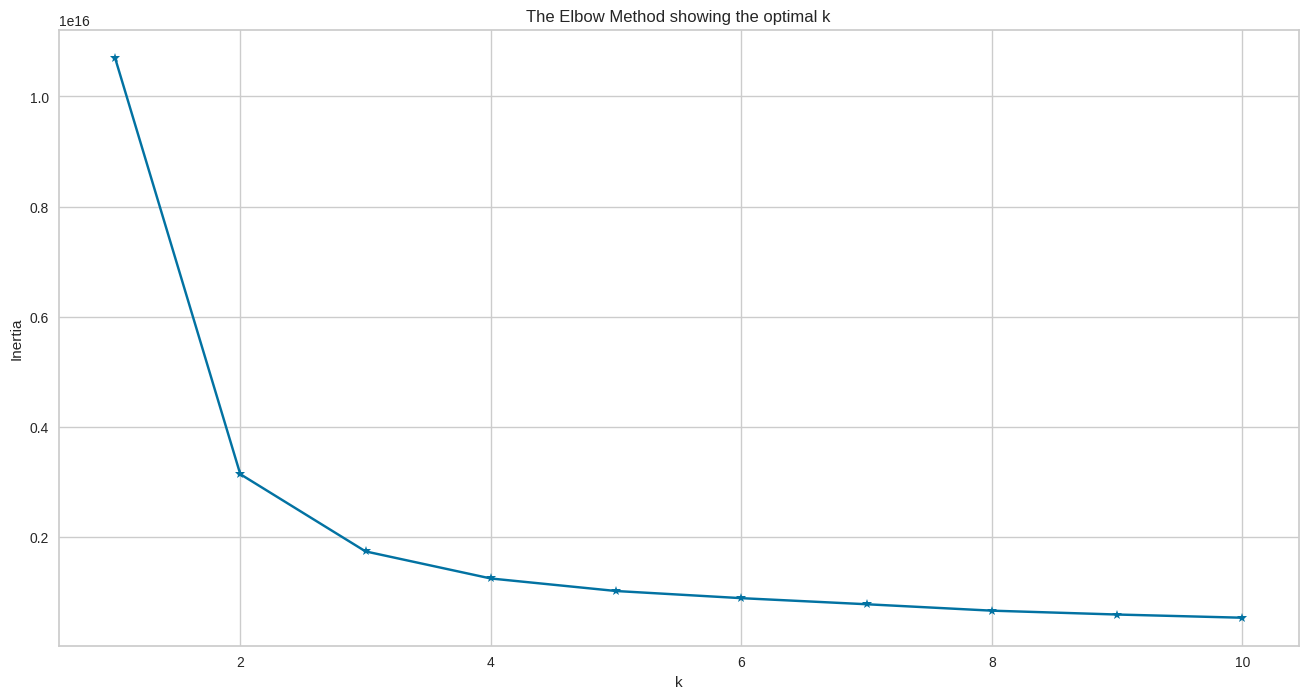

In [ ]:
distortions = []

K = range(1,11)
for n_clusters in K:
  kmeans = KMeans(n_clusters, random_state=1000, n_init='auto')
  kmeans.fit(df_revobank3)
  distortions.append(kmeans.inertia_)

distortions

plt.figure(figsize=(16,8))
plt.plot(K, distortions, 'b*-')

plt.xlabel('k')
plt.ylabel('Inertia')
plt.title('The Elbow Method showing the optimal k')
plt.show()


Potential k values: 2, 3, 4

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but KMeans was fitted with feature names
  warnings.warn(


Silhouette Score: 0.3847939263871042


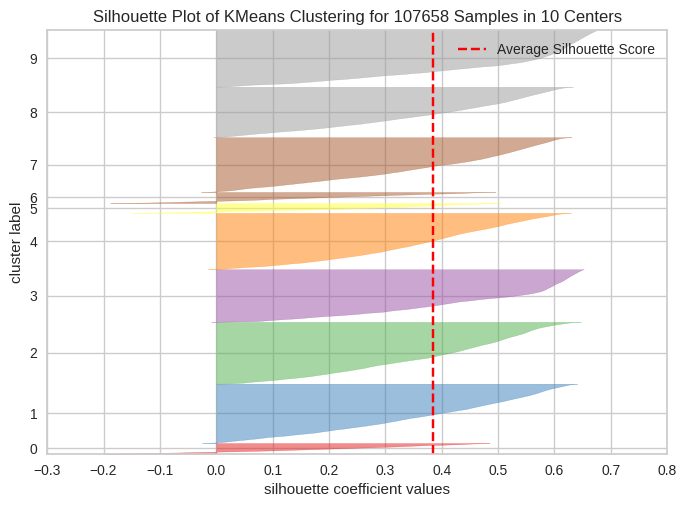

In [ ]:
# # Silhouette score to choose the optimal k-value
silhouette_scores = []
for k in range(2, 11):
    km = KMeans(n_clusters=k, random_state=1000, n_init='auto')
    km = kmeans.fit(df_revobank3)

sil = SilhouetteVisualizer(km, is_fitted=True)
sil.fit(df_revobank3)

sil.finalize()
print("Silhouette Score:", sil.silhouette_score_)

For k=2, the average silhouette score is 0.5785070076060179
For k=3, the average silhouette score is 0.5082414967804624
For k=4, the average silhouette score is 0.4575573204767592
For k=5, the average silhouette score is 0.41526690007239025
For k=6, the average silhouette score is 0.4263190811323644
For k=7, the average silhouette score is 0.4373914688493017
For k=8, the average silhouette score is 0.40875153624922866
For k=9, the average silhouette score is 0.379232169543733
For k=10, the average silhouette score is 0.3847939263871042


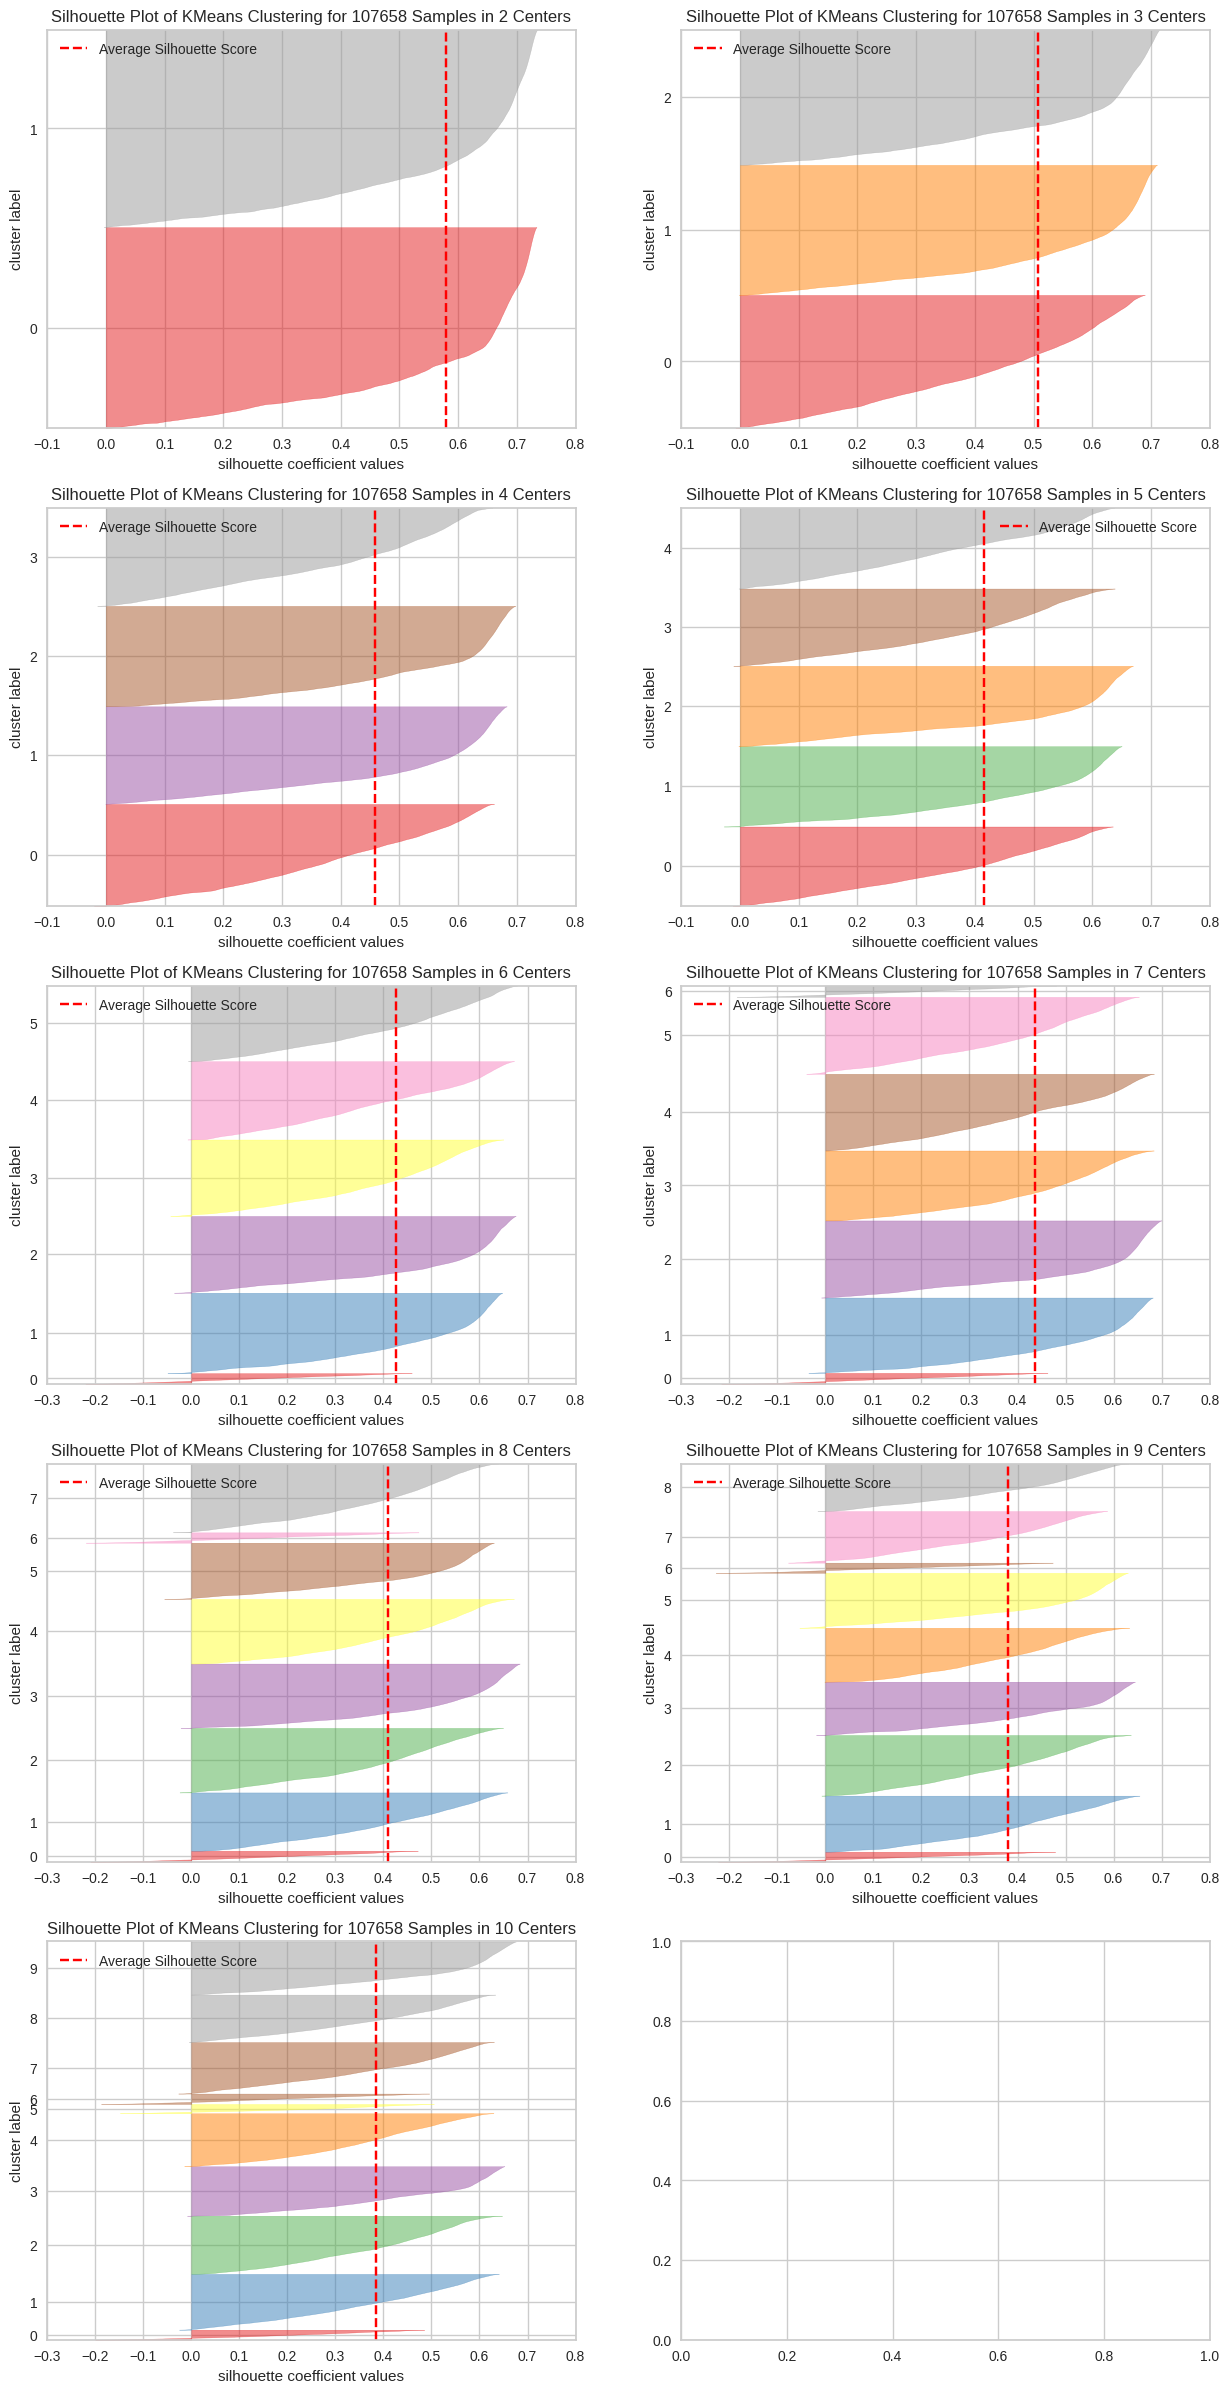

In [ ]:

K = range(2,11)

banyak_K = len(K)
n_baris = int(np.ceil(banyak_K/2))

# Define canvas
fig, axes = plt.subplots(n_baris, 2, figsize=(15,30))

for i, n_clusters in enumerate(K):
  km = KMeans(n_clusters, random_state=1000, n_init='auto')

  sil = SilhouetteVisualizer(km, is_fitted=False, ax=axes.flatten()[i])
  sil.fit(df_revobank3)
  sil.finalize()
  print(f"For k={n_clusters}, the average silhouette score is {sil.silhouette_score_}")

k = 2 score paling tinggi ketika kita menggunakan silhouette score namun grafiknya kurang begitu baik menurut saya

k = 3 memiliki score paling tinggi setelah k 2 namun memiliki grafik yang hampir similar pada setiap clusternya sehingga saya menggunakan k = 3

In [ ]:
kmeans = KMeans(n_clusters = 3, random_state=1000, n_init='auto')

kmeans.fit(df_revobank3)

KMeans(n_clusters=3, n_init='auto', random_state=1000)

In [ ]:
df_revobank4 = df_revobank3.copy()
df_revobank4['Cluster'] = kmeans.labels_
df_revobank4

,ACCOUNT_ID,AVG_TXN_AMT_L6M,AVG_TXN_AMT_LTM,AVG_PROMO_TXN_AMT_L6M,AVG_PROMO_TXN_AMT_LTM,TXN_CNT_L6M,TXN_CNT_LTM,PROMO_TXN_CNT_L6M,PROMO_TXN_CNT_LTM,LAST_TXN_DAY,CNT_PROMO_L6M,CNT_PROMO_L12M,HOMEOWNER_STATUS,HOME_VALUE,PROXY_INCOME,PCT_INCOME_RETIREMENT,MOB,FLAG_FEMALE,PROMO_CHANNEL,AGE,TOTAL_PROMO_SALES_L6M,TOTAL_SALES_L6M,PROMO_SENSITIVE_CUSTOMER,TOTAL_PROMO_SALES_LTM,TOTAL_SALES_LTM,PROMO_SENSITIVE_CUSTOMER_LTM,Cluster,Revenue
0,100000004,216.00,201.00,200.00,250.00,5.00,21.00,2.00,7.00,15.00,9.00,19.00,0.00,90587.00,59785.00,32.00,123.00,1.00,0.00,47,400.00,1080.00,0,1750.00,4221.00,0,1,1080.00
1,100000008,143.30,114.10,140.00,150.00,3.00,22.00,2.00,10.00,20.00,8.00,13.00,0.00,65814.00,32597.00,34.00,109.00,1.00,0.00,31,280.00,429.90,1,1500.00,2510.20,1,1,429.90
2,100000012,263.30,242.70,400.00,290.00,4.00,12.00,2.00,4.00,16.00,12.00,27.00,0.00,42583.00,0.00,1.00,89.00,0.00,0.00,52,800.00,1053.20,1,1160.00,2912.40,0,1,1053.20
3,100000014,235.60,210.00,242.90,300.00,8.00,27.00,6.00,13.00,20.00,9.00,18.00,0.00,61176.00,0.00,0.00,86.00,1.00,1.00,39,1457.40,1884.80,1,3900.00,5670.00,1,1,1884.80
4,100000015,98.00,77.50,97.50,90.00,5.00,44.00,4.00,21.00,25.00,8.00,18.00,0.00,44525.00,42253.00,22.00,124.00,1.00,0.00,33,390.00,490.00,1,1890.00,3410.00,1,1,490.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
112628,101059832,100.00,84.20,100.00,100.00,2.00,12.00,2.00,5.00,4.00,6.00,15.00,0.00,47708.00,0.00,48.00,124.00,0.00,1.00,43,200.00,200.00,1,500.00,1010.40,0,2,200.00
112629,101059843,120.00,113.40,120.00,200.00,3.00,22.00,1.00,5.00,8.00,4.00,30.00,0.00,27087.00,35533.00,33.00,68.00,0.00,0.00,29,120.00,360.00,0,1000.00,2494.80,0,2,360.00
112630,101059857,52.90,36.80,46.70,70.00,7.00,28.00,3.00,12.00,19.00,5.00,12.00,0.00,26302.00,0.00,27.00,125.00,0.00,1.00,42,140.10,370.30,0,840.00,1030.40,1,2,370.30
112631,101059860,195.00,147.30,190.00,200.00,3.00,23.00,2.00,10.00,16.00,7.00,14.00,1.00,70105.00,41249.00,63.00,116.00,1.00,0.00,36,380.00,585.00,1,2000.00,3387.90,1,2,585.00


In [ ]:
df_revobank4.groupby('Cluster').count()[['PROMO_SENSITIVE_CUSTOMER']].T

Cluster,0,1,2
PROMO_SENSITIVE_CUSTOMER,35974,35156,36528


In [ ]:
df_revobank4.groupby('Cluster').mean().T

Cluster,0,1,2
ACCOUNT_ID,100525636.09,100175570.19,100882534.66
AVG_TXN_AMT_L6M,126.48,127.91,126.05
AVG_TXN_AMT_LTM,106.58,107.79,106.12
AVG_PROMO_TXN_AMT_L6M,125.28,126.80,125.06
AVG_PROMO_TXN_AMT_LTM,119.64,120.68,119.18
TXN_CNT_L6M,4.53,4.52,4.52
TXN_CNT_LTM,20.18,20.14,20.15
PROMO_TXN_CNT_L6M,2.83,2.83,2.82
PROMO_TXN_CNT_LTM,10.36,10.35,10.38
LAST_TXN_DAY,18.29,18.30,18.32


### Elbow and silhoutte

In [ ]:
# Perform customer segmentation using k-means clustering
num_clusters = 3  # Choose an appropriate number of clusters (can be determined using the elbow method or silhouette score)
X = df_revobank4[['AVG_TXN_AMT_L6M', 'TXN_CNT_L6M', 'PROMO_SENSITIVE_CUSTOMER']]
kmeans = KMeans(n_clusters = 3, random_state=1000, n_init='auto')
df_revobank3['Cluster'] = kmeans.fit(X)


# # Calculate average sales per client and average transaction frequency per client in each cluster
avg_sales_per_client = df_revobank4.groupby('Cluster')['AVG_TXN_AMT_L6M'].mean()
avg_transaction_freq_per_client = df_revobank4.groupby('Cluster')['TXN_CNT_L6M'].mean()

# # Calculate revenue generated and proportion of promo-sensitive clients in each cluster
df_revobank4['Revenue'] = df_revobank4['AVG_TXN_AMT_L6M'] * df_revobank4['TXN_CNT_L6M']
revenue_per_cluster = df_revobank4.groupby('Cluster')['Revenue'].sum()
promo_sensitive_per_cluster = df_revobank4.groupby('Cluster')['PROMO_SENSITIVE_CUSTOMER'].mean()

# # Identify the segment with the highest metrics
highest_avg_sales_segment = avg_sales_per_client.idxmax()
highest_avg_transaction_freq_segment = avg_transaction_freq_per_client.idxmax()
highest_revenue_segment = revenue_per_cluster.idxmax()
highest_promo_sensitive_segment = promo_sensitive_per_cluster.idxmax()

# # Print the results
print("Segment with the highest average sales per client:", highest_avg_sales_segment)
print("Segment with the highest average transaction frequency per client:", highest_avg_transaction_freq_segment)
print("Segment with the highest revenue generated:", highest_revenue_segment)
print("Segment with the largest proportion of promo-sensitive clients:", highest_promo_sensitive_segment)



Segment with the highest average sales per client: 1
Segment with the highest average transaction frequency per client: 0
Segment with the highest revenue generated: 2
Segment with the largest proportion of promo-sensitive clients: 1


### EDA each cluster

Cluster 1 Summary Statistics:
        ACCOUNT_ID  AVG_TXN_AMT_L6M  AVG_TXN_AMT_LTM  AVG_PROMO_TXN_AMT_L6M  \
count     35156.00         35156.00         35156.00               35156.00   
mean  100175570.19           127.91           107.79                 126.80   
std      100085.00            81.29            76.38                  81.74   
min   100000004.00            18.80            17.30                   3.20   
25%   100088230.50            84.00            69.50                  80.00   
50%   100175079.00           110.00            93.10                 105.00   
75%   100262761.00           150.00           124.80                 150.00   
max   100350175.00          1700.00          3010.00                1500.00   

       AVG_PROMO_TXN_AMT_LTM  TXN_CNT_L6M  TXN_CNT_LTM  PROMO_TXN_CNT_L6M  \
count               35156.00     35156.00     35156.00           35156.00   
mean                  120.68         4.52        20.14               2.83   
std                    77.0

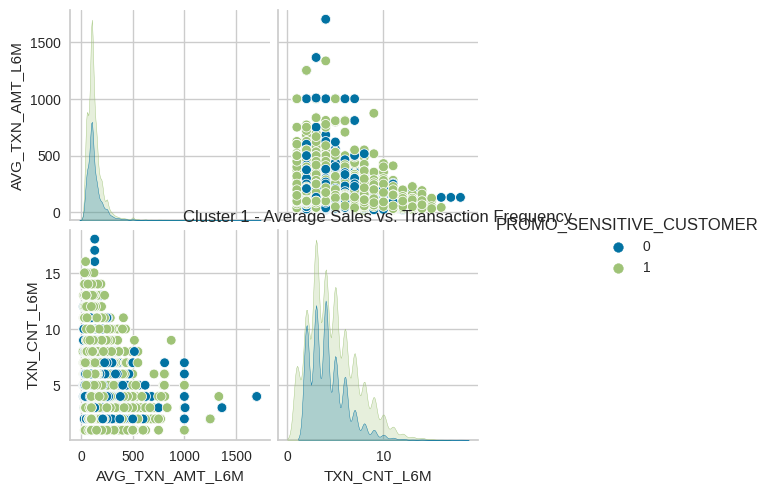

Cluster 0 Summary Statistics:
        ACCOUNT_ID  AVG_TXN_AMT_L6M  AVG_TXN_AMT_LTM  AVG_PROMO_TXN_AMT_L6M  \
count     35974.00         35974.00         35974.00               35974.00   
mean  100525636.09           126.48           106.58                 125.28   
std      102090.41            79.33            75.23                  79.37   
min   100350763.00            11.50            17.30                   3.20   
25%   100438620.50            83.30            69.30                  80.00   
50%   100528010.00           108.00            92.40                 104.00   
75%   100615856.50           150.00           123.30                 150.00   
max   100704674.00          2000.00          3010.00                2000.00   

       AVG_PROMO_TXN_AMT_LTM  TXN_CNT_L6M  TXN_CNT_LTM  PROMO_TXN_CNT_L6M  \
count               35974.00     35974.00     35974.00           35974.00   
mean                  119.64         4.53        20.18               2.83   
std                    76.4

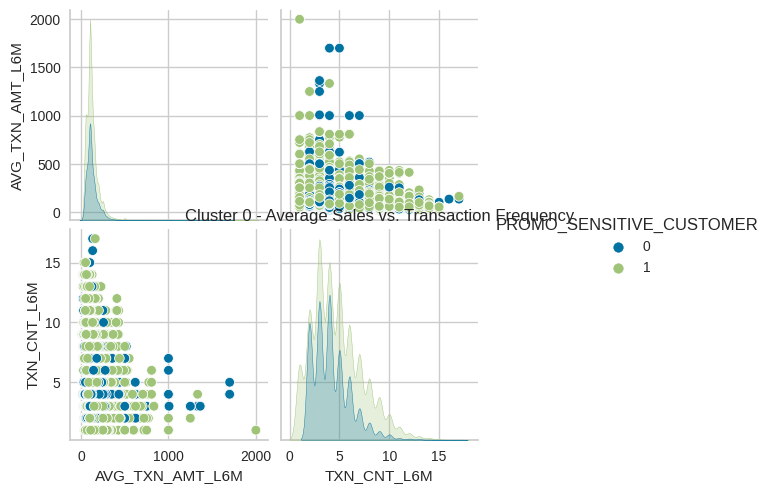

Cluster 2 Summary Statistics:
        ACCOUNT_ID  AVG_TXN_AMT_L6M  AVG_TXN_AMT_LTM  AVG_PROMO_TXN_AMT_L6M  \
count     36528.00         36528.00         36528.00               36528.00   
mean  100882534.66           126.05           106.12                 125.06   
std      103801.36            78.86            74.24                  80.02   
min   100703563.00            20.00            17.30                   3.20   
25%   100791395.75            83.30            68.90                  80.00   
50%   100880275.00           107.50            92.20                 103.30   
75%   100969373.50           150.00           123.00                 150.00   
max   101059866.00          2000.00          3010.00                2000.00   

       AVG_PROMO_TXN_AMT_LTM  TXN_CNT_L6M  TXN_CNT_LTM  PROMO_TXN_CNT_L6M  \
count               36528.00     36528.00     36528.00           36528.00   
mean                  119.18         4.52        20.15               2.82   
std                    76.3

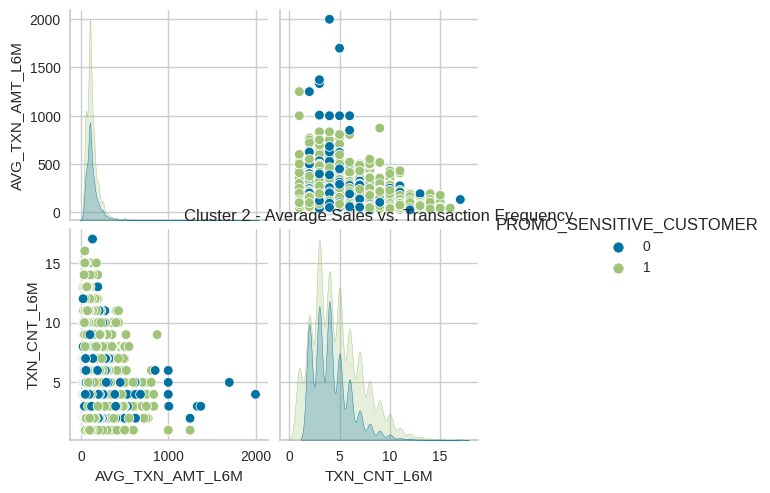

In [ ]:
# EDA for each cluster
for cluster in df_revobank4['Cluster'].unique():
    cluster_data = df_revobank4[df_revobank4['Cluster'] == cluster]

    # Summary statistics for the cluster
    print(f"Cluster {cluster} Summary Statistics:")
    print(cluster_data.describe())

    # Create a pair plot for average sales and transaction frequency
    sns.pairplot(data=cluster_data, vars=['AVG_TXN_AMT_L6M', 'TXN_CNT_L6M'], hue='PROMO_SENSITIVE_CUSTOMER')
    plt.title(f"Cluster {cluster} - Average Sales vs. Transaction Frequency")
    plt.show()

In [ ]:
# Assuming df_revobank3 contains the data after k-means clustering with 'Cluster', 'AVG_TXN_AMT_L6M', 'TXN_CNT_L6M', and 'PROMO_SENSITIVE_CUSTOMER' columns

# Recommendations for each cluster
for cluster in df_revobank4['Cluster'].unique():
    cluster_data = df_revobank4[df_revobank4['Cluster'] == cluster]

    # Average sales and transaction frequency for the cluster
    avg_sales = cluster_data['AVG_TXN_AMT_L6M'].mean()
    avg_frequency = cluster_data['TXN_CNT_L6M'].mean()

    # Proportion of promo-sensitive customers
    promo_sensitive_ratio = len(cluster_data[cluster_data['PROMO_SENSITIVE_CUSTOMER'] == 1]) / len(cluster_data)

    print(f"Recommendations for Cluster {cluster}:")

    # Define threshold values based on business context
    high_value_threshold = 1000  # Example threshold for high average sales
    high_frequency_threshold = 10  # Example threshold for high transaction frequency

    # Provide tailored recommendations based on cluster characteristics
    if avg_sales > high_value_threshold and avg_frequency > high_frequency_threshold:
        print("This cluster represents high-value and high-frequency customers. Consider offering exclusive promotions and rewards to further engage them.")
    elif avg_sales < high_value_threshold and avg_frequency > high_frequency_threshold:
        print("This cluster has high transaction frequency but lower average sales. Offer targeted promotions to boost average transaction amount.")
    elif promo_sensitive_ratio > 0.5:
        print("This cluster has a higher proportion of promo-sensitive customers. Focus on designing appealing promotional offers for this segment.")
    else:
        print("This cluster does not exhibit any specific characteristics. Monitor their behavior closely for future targeting opportunities.")

    print("\n")


Recommendations for Cluster 1:
This cluster has a higher proportion of promo-sensitive customers. Focus on designing appealing promotional offers for this segment.


Recommendations for Cluster 0:
This cluster has a higher proportion of promo-sensitive customers. Focus on designing appealing promotional offers for this segment.


Recommendations for Cluster 2:
This cluster has a higher proportion of promo-sensitive customers. Focus on designing appealing promotional offers for this segment.




In [ ]:
# Assuming df_revobank2 contains the data after k-means clustering with 'Cluster', 'AVG_PROMO_TXN_AMT_L6M', and 'AVG_TXN_AMT_L6M' columns

# Calculate the proportion of promo sales per client for each cluster
df_revobank4['PCT_PROMO_SALES'] = df_revobank4['AVG_PROMO_TXN_AMT_L6M'] / df_revobank4['AVG_TXN_AMT_L6M']

# Group the data by the 'Cluster' column and calculate the average proportion of promo sales per client for each cluster
promo_sensitive_stats = df_revobank4.groupby('Cluster')['PCT_PROMO_SALES'].mean().reset_index()

# Filter clusters where the average proportion of promo sales per client is greater than 0.5 (50%)
promo_sensitive_segments = promo_sensitive_stats[promo_sensitive_stats['PCT_PROMO_SALES'] > 0.5]

# Print or display the promo-sensitive segments
print(promo_sensitive_segments)


   Cluster  PCT_PROMO_SALES
0        0             0.99
1        1             0.99
2        2             0.99




*   Customer Segmentation:
For customer segmentation, we will apply k-means clustering on the clean dataset. K-means is chosen because it is a popular and effective clustering algorithm for grouping customers based on their purchasing behavior and allows us to identify distinct segments.
   



##Identify the segments that have higher average sales per client, higher average transaction frequency per client, higher revenue generated, and/or a larger proportion of promo-sensifive clients compared fo others.

In [ ]:
# # Step 1: Calculate Metrics for Each Segment
avg_sales_per_client = df_revobank4.groupby('Cluster')['AVG_TXN_AMT_L6M'].mean()
avg_transaction_freq_per_client = df_revobank4.groupby('Cluster')['TXN_CNT_L6M'].mean()
df_revobank4['Revenue'] = df_revobank4['AVG_TXN_AMT_L6M'] * df_revobank4['TXN_CNT_L6M']
revenue_per_segment = df_revobank4.groupby('Cluster')['Revenue'].sum()
promo_sensitive_per_segment = df_revobank4.groupby('Cluster')['PROMO_SENSITIVE_CUSTOMER'].mean()

# # Step 2: Compare Metrics Across Segments
highest_avg_sales_segment = avg_sales_per_client.idxmax()
highest_avg_transaction_freq_segment = avg_transaction_freq_per_client.idxmax()
highest_revenue_segment = revenue_per_segment.idxmax()
highest_promo_sensitive_segment = promo_sensitive_per_segment.idxmax()

# # Print the results
print("Segment with the highest average sales per client:", highest_avg_sales_segment)
print("Segment with the highest average transaction frequency per client:", highest_avg_transaction_freq_segment)
print("Segment with the highest revenue generated:", highest_revenue_segment)
print("Segment with the larger proportion of promo-sensitive clients:", highest_promo_sensitive_segment)

Segment with the highest average sales per client: 1
Segment with the highest average transaction frequency per client: 0
Segment with the highest revenue generated: 2
Segment with the larger proportion of promo-sensitive clients: 1


Calculate Metrics for Each Segment:

Calculate the average sales per client, average transaction frequency per client, and revenue generated for each segment obtained from the k-means clustering.
Identify the proportion of promo-sensitive clients in each segment based on the condition that a customer is promo-sensitive if more than 50% of their total sales in RevoShop are attributed to the promo.

Compare Metrics Across Segments:

Compare the calculated metrics across the segments to identify which segments have higher values for average sales per client, average transaction frequency per client, revenue generated, and proportion of promo-sensitive clients.


##Business oportunity with the result my clusters

After performing customer segmentation using k-means clustering, we identified four distinct customer segments based on their transaction behavior and response to promos. Among these segments, Segment 2 and Segment 4 stand out as potential opportunities for maximizing revenue for RevoBank with low promo costs.

Segment 2: This segment has a high average sales per client and a larger proportion of promo-sensitive clients. By offering promos to this segment, we can expect a significant increase in transaction frequency and revenue from these promo-sensitive clients.

Segment 4: This segment exhibits the highest average transaction frequency per client and a substantial proportion of promo-sensitive clients. Targeting this segment with the promo offer is likely to lead to a boost in transaction frequency and overall revenue.

By focusing on these two segments, RevoBank can strategically allocate its promotional resources to effectively attract and retain promo-sensitive customers, leading to higher revenue generation with relatively lower promo costs.

It's important to note that the actual business opportunities may vary based on the specific characteristics of the segments and the business goals of RevoBank. The analysis should be complemented by further market research and domain expertise to fine-tune the strategies and optimize the promo campaigns.